# Bibliotecas usadas

In [26]:
import pandas as pd
import numpy as np
import sweetviz as sv
import pickle as pkl

from dython.nominal import associations

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Funções de utilidade

In [27]:
def ip_to_int(ip: str) -> int:
  ip = ip.split('.')
  ip = ''.join(ip)

  return ip

# União dos conjuntos de dados

In [28]:
df_features = pd.read_csv("../data/files/NUSW-NB15_features.csv", encoding = "latin1")

In [29]:
df_1 = pd.read_csv("../data/files/UNSW-NB15_1.csv")
df_2 = pd.read_csv("../data/files/UNSW-NB15_2.csv")
df_3 = pd.read_csv("../data/files/UNSW-NB15_3.csv")
df_4 = pd.read_csv("../data/files/UNSW-NB15_4.csv")

C:\Users\rober\AppData\Local\Temp\ipykernel_8956\1301748434.py:1: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv("../data/files/UNSW-NB15_1.csv")
C:\Users\rober\AppData\Local\Temp\ipykernel_8956\1301748434.py:2: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv("../data/files/UNSW-NB15_2.csv")


In [30]:
df_1.columns = list(df_features["Name"])
df_2.columns = list(df_features["Name"])
df_3.columns = list(df_features["Name"])
df_4.columns = list(df_features["Name"])

In [31]:
df = pd.concat([df_1, df_2, df_3, df_4]).reset_index(drop = True)

In [32]:
df

srcip  sport           dstip dsport proto state       dur  \
0          59.166.0.0  33661   149.171.126.9   1024   udp   CON  0.036133   
1          59.166.0.6   1464   149.171.126.7     53   udp   CON  0.001119   
2          59.166.0.5   3593   149.171.126.5     53   udp   CON  0.001209   
3          59.166.0.3  49664   149.171.126.0     53   udp   CON  0.001169   
4          59.166.0.0  32119   149.171.126.9    111   udp   CON  0.078339   
...               ...    ...             ...    ...   ...   ...       ...   
2540038    59.166.0.5  33094   149.171.126.7  43433   tcp   FIN  0.087306   
2540039    59.166.0.7  20848   149.171.126.4     21   tcp   CON  0.365058   
2540040    59.166.0.3  21511   149.171.126.9     21   tcp   CON  6.335154   
2540041    59.166.0.9  35433   149.171.126.0     80   tcp   CON  2.200934   
2540042  175.45.176.0  17293  149.171.126.17    110   tcp   CON  0.942984   

         sbytes  dbytes  sttl  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst  \
0           528     304    31  ...           0           2           4   
1           146     178    31  ...           0          12           8   
2           132     164    31  ...           0           6           9   
3           146     178    31  ...           0           7           9   
4           568     312    31  ...           0           2           4   
...         ...     ...   ...  ...         ...         ...         ...   
2540038     320    1828    31  ...                       1           2   
2540039     456     346    31  ...           2           2           2   
2540040    1802    2088    31  ...           2           2           2   
2540041    3498  166054    31  ...                       1           1   
2540042     574     676    62  ...                       1           1   

        ct_dst_ltm  ct_src_ ltm  ct_src_dport_ltm  ct_dst_sport_ltm  \
0                2            3                 1                 1   
1                1            2                 2                 1   
2                1            1                 1                 1   
3                1            1                 1                 1   
4                2            3                 1                 1   
...            ...          ...               ...               ...   
2540038          3            3                 1                 1   
2540039          2            2                 2                 2   
2540040          4            2                 2                 2   
2540041          2            4                 2                 2   
2540042          2            4                 2                 2   

         ct_dst_src_ltm  attack_cat  Label  
0                     2         NaN      0  
1                     1         NaN      0  
2                     1         NaN      0  
3                     1         NaN      0  
4                     2         NaN      0  
...                 ...         ...    ...  
2540038               3         NaN      0  
2540039               2         NaN      0  
2540040               2         NaN      0  
2540041               2         NaN      0  
2540042               2    Exploits      1  

[2540043 rows x 49 columns]

# Exploração, limpeza e normalização da base

## A base tem as seguintes características

In [33]:
df_features

No.              Name      Type   \
0     1             srcip    nominal   
1     2             sport    integer   
2     3             dstip    nominal   
3     4            dsport    integer   
4     5             proto    nominal   
5     6             state    nominal   
6     7               dur      Float   
7     8            sbytes    Integer   
8     9            dbytes    Integer   
9    10              sttl    Integer   
10   11              dttl    Integer   
11   12             sloss    Integer   
12   13             dloss    Integer   
13   14           service    nominal   
14   15             Sload      Float   
15   16             Dload      Float   
16   17             Spkts    integer   
17   18             Dpkts    integer   
18   19              swin    integer   
19   20              dwin    integer   
20   21             stcpb    integer   
21   22             dtcpb    integer   
22   23           smeansz    integer   
23   24           dmeansz    integer   
24   25       trans_depth    integer   
25   26       res_bdy_len    integer   
26   27              Sjit      Float   
27   28              Djit      Float   
28   29             Stime  Timestamp   
29   30             Ltime  Timestamp   
30   31           Sintpkt      Float   
31   32           Dintpkt      Float   
32   33            tcprtt      Float   
33   34            synack      Float   
34   35            ackdat      Float   
35   36   is_sm_ips_ports     Binary   
36   37      ct_state_ttl    Integer   
37   38  ct_flw_http_mthd    Integer   
38   39      is_ftp_login     Binary   
39   40        ct_ftp_cmd    integer   
40   41        ct_srv_src    integer   
41   42        ct_srv_dst    integer   
42   43        ct_dst_ltm    integer   
43   44       ct_src_ ltm    integer   
44   45  ct_src_dport_ltm    integer   
45   46  ct_dst_sport_ltm    integer   
46   47    ct_dst_src_ltm    integer   
47   48        attack_cat    nominal   
48   49             Label     binary   

                                          Description  
0                                   Source IP address  
1                                  Source port number  
2                              Destination IP address  
3                             Destination port number  
4                                Transaction protocol  
5   Indicates to the state and its dependent proto...  
6                               Record total duration  
7            Source to destination transaction bytes   
8             Destination to source transaction bytes  
9           Source to destination time to live value   
10           Destination to source time to live value  
11           Source packets retransmitted or dropped   
12       Destination packets retransmitted or dropped  
13  http, ftp, smtp, ssh, dns, ftp-data ,irc  and ...  
14                             Source bits per second  
15                        Destination bits per second  
16                Source to destination packet count   
17                 Destination to source packet count  
18              Source TCP window advertisement value  
19         Destination TCP window advertisement value  
20                    Source TCP base sequence number  
21               Destination TCP base sequence number  
22  Mean of the ?ow packet size transmitted by the...  
23  Mean of the ?ow packet size transmitted by the...  
24  Represents the pipelined depth into the connec...  
25  Actual uncompressed content size of the data t...  
26                               Source jitter (mSec)  
27                          Destination jitter (mSec)  
28                                  record start time  
29                                   record last time  
30             Source interpacket arrival time (mSec)  
31        Destination interpacket arrival time (mSec)  
32  TCP connection setup round-trip time, the sum ...  
33  TCP connection setup time, the time between th...  
34  TCP connection setup time, the time bet

## Exploração de dados inconsistentes na base e limpeza

### Busca de dados faltantes

In [34]:
df.isna().sum()

srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
Sload                     0
Dload                     0
Spkts                     0
Dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports     

### Retificação dos dados

In [35]:
df.dtypes

srcip                object
sport                object
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports     

#### Conversão da coluna srcip para tipo numérico

In [36]:
vectorized_ip_to_int = np.vectorize(ip_to_int)

In [37]:
df["srcip"] = vectorized_ip_to_int(df["srcip"]).astype(float)

#### Conversão da coluna sport para tipo 

In [38]:
'''
  df["sport"].astype(int) gera erro. Há número hexadecimais e caracteres '-' na base.
'''

df["sport"][df["sport"].str.contains("x") == True]

36371     0x000b
36372     0x000b
47315     0x000c
47316     0x000c
116471    0x000c
116472    0x000c
Name: sport, dtype: object

In [39]:
df.loc[df["sport"] == "0x000b" ,"sport"] = int("0x000b", 0)
df.loc[df["sport"] == "0x000c" ,"sport"] = int("0x000c", 0)

df = df.drop(index = df[df["sport"] == '-'].index).reset_index(drop = True)

In [40]:
df["sport"] = df["sport"].astype(int)

#### Conversão da coluna dstip para tipo numérico

In [41]:
df["dstip"] = vectorized_ip_to_int(df["dstip"]).astype(float)

#### Conversão da coluna dsport para tipo numérico.

In [42]:
'''
  df["dsport"].astype(int) gera erro. Há número hexadecimais e caracteres '-' na base.
'''

df["dsport"][df["dsport"].str.contains("x") == True].unique()

array(['0xc0a8', '0x20205321', '0xcc09'], dtype=object)

In [43]:
df.loc[df["dsport"] == "0xc0a8", "dsport"] = int("0xc0a8", 0)
df.loc[df["dsport"] == "0x20205321", "dsport"] = int("0x20205321", 0)
df.loc[df["dsport"] == "0xcc09", "dsport"] = int("0xcc09", 0)

df = df.drop(index = df[df["dsport"] == '-'].index).reset_index(drop = True)

In [44]:
df["dsport"] = df["dsport"].astype(int)

#### Retificação da coluna "ct_ftp_cmd"

In [45]:
'''
  Com df["ct_ftp_cmd"].unique() pode-se ver inconsistências nos dados 
'''

df.loc[df["ct_ftp_cmd"] == ' ', "ct_ftp_cmd"] = 0
df.loc[df["ct_ftp_cmd"] == '0', "ct_ftp_cmd"] = 0
df.loc[df["ct_ftp_cmd"] == '1', "ct_ftp_cmd"] = 1
df.loc[df["ct_ftp_cmd"] == '2', "ct_ftp_cmd"] = 2
df.loc[df["ct_ftp_cmd"] == '4', "ct_ftp_cmd"] = 4

df["ct_ftp_cmd"] = df["ct_ftp_cmd"].astype(int)

#### Retificação da coluna "is_ftp_login"

In [46]:
df.loc[df["is_ftp_login"].isna(), "is_ftp_login"] = 0

df["is_ftp_login"] = df["is_ftp_login"].astype(int)

#### Retificação da coluna "ct_flw_http_mthd"

In [47]:
df["ct_flw_http_mthd"] = df["ct_flw_http_mthd"].fillna(df["ct_flw_http_mthd"].mean())

#### Retificação e codificação da coluna "attack_cat"

In [23]:
'''
  Com df["attack_cat"].unique() percebe-se dados com espaços anteriores e posteriores 
'''

df["attack_cat"] = df["attack_cat"].str.strip()
df.loc[df["attack_cat"] == "Backdoor", "attack_cat"] = "Backdoors"

attack_cat_label_encoder = LabelEncoder().fit(df["attack_cat"])
df["attack_cat"] = attack_cat_label_encoder.transform(df["attack_cat"])

#### Salva-se o codificador dos tipos de ataques

In [24]:
pkl.dump(attack_cat_label_encoder, open("../data/utilities/models/attack_cat_label_encoder.pkl", "wb"))

#### Codificação da coluna "proto"

In [55]:
df["proto"] = LabelEncoder().fit_transform(df["proto"])

#### Codificação da coluna "state"

In [56]:
df["state"] = LabelEncoder().fit_transform(df["state"])

#### Codificação da coluna "service"

In [57]:
df["service"] = LabelEncoder().fit_transform(df["service"])

### Visualização geral da base

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:03 -> (00:00 left)



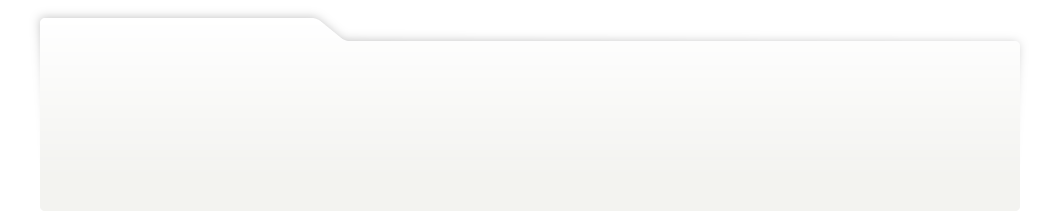
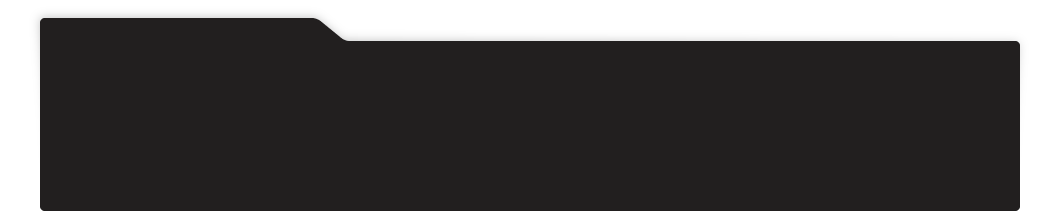
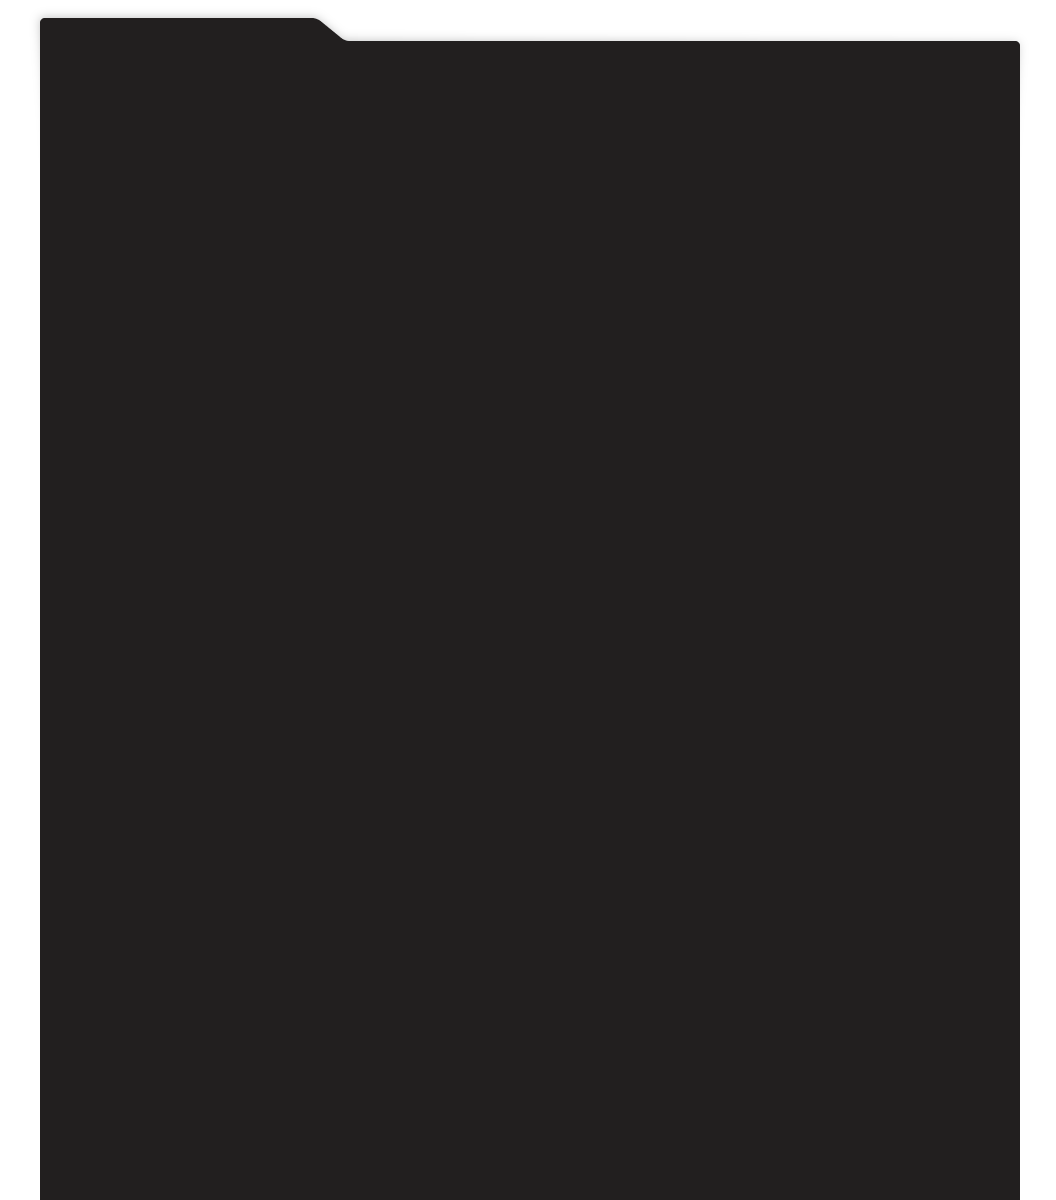
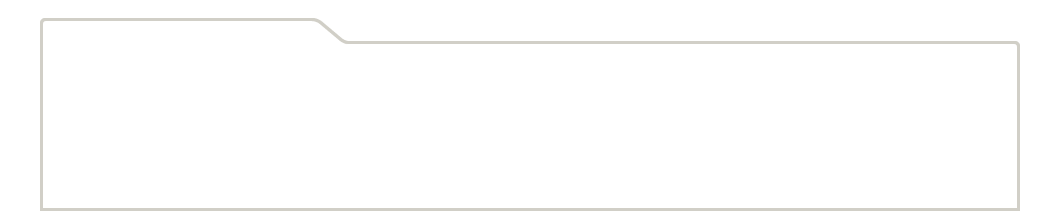
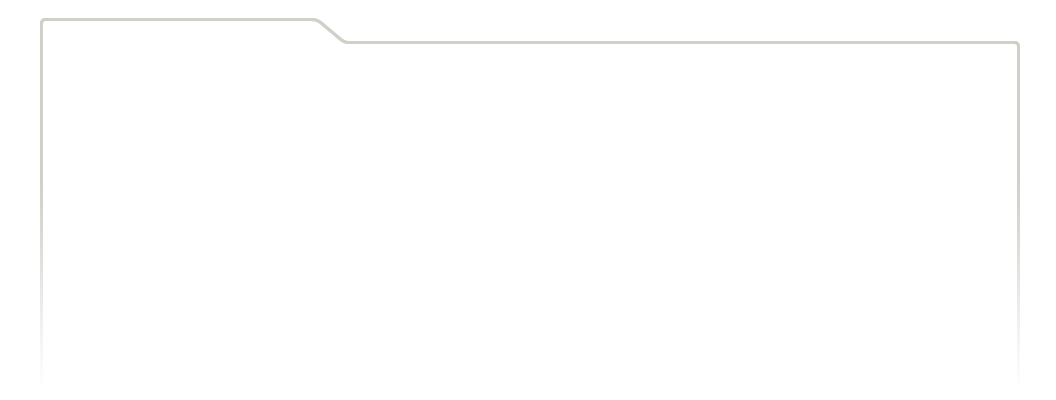
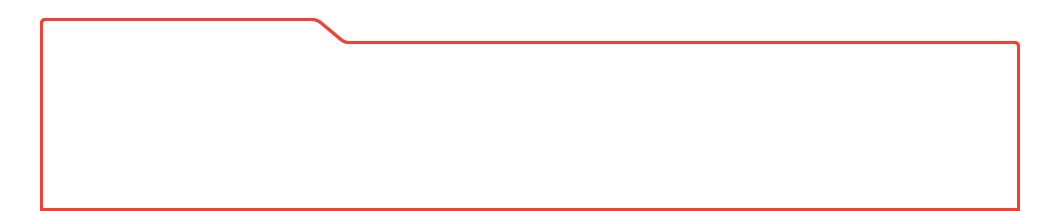
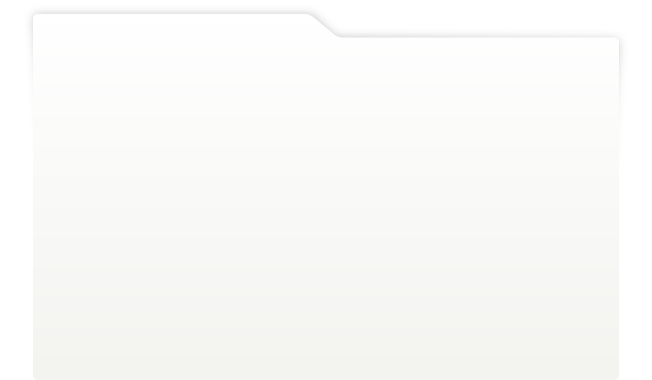
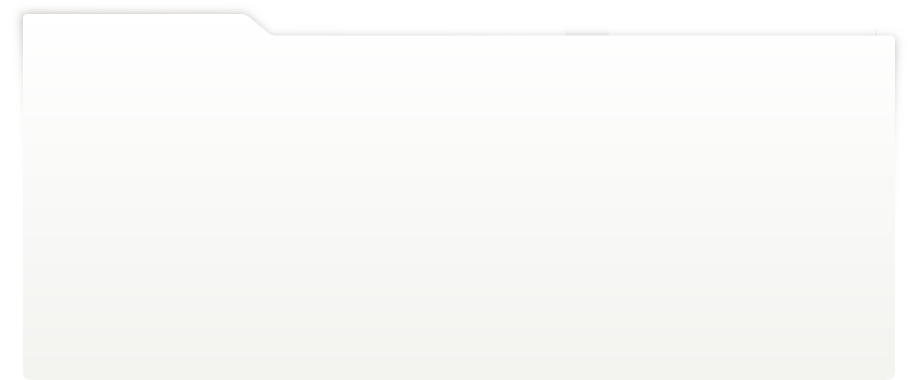
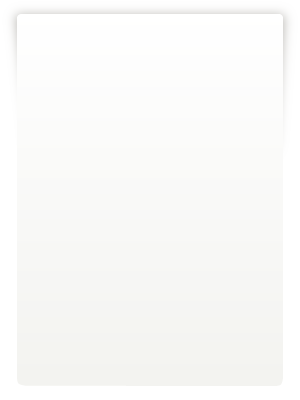
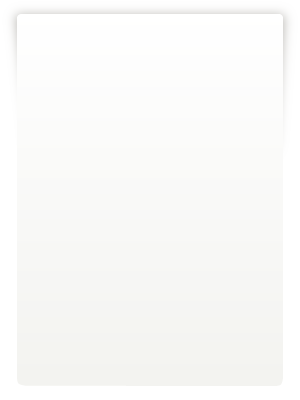
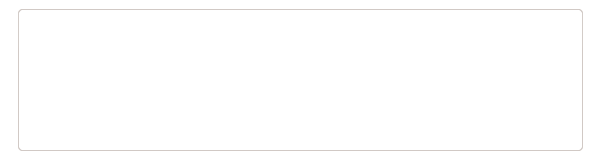
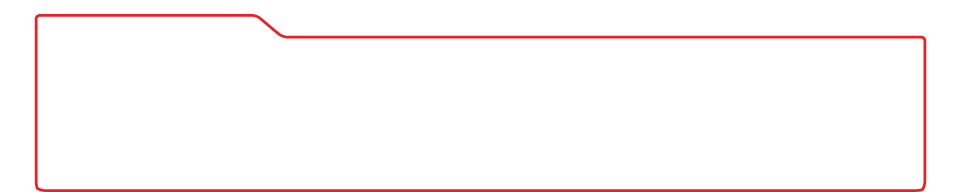
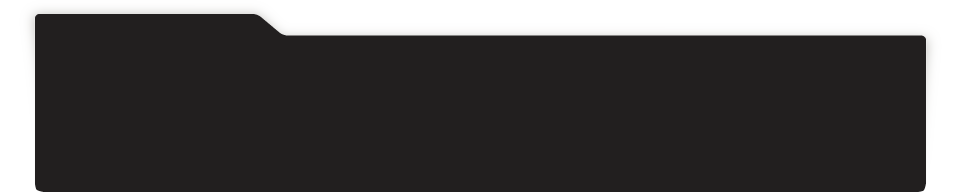
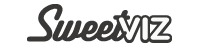
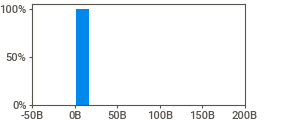
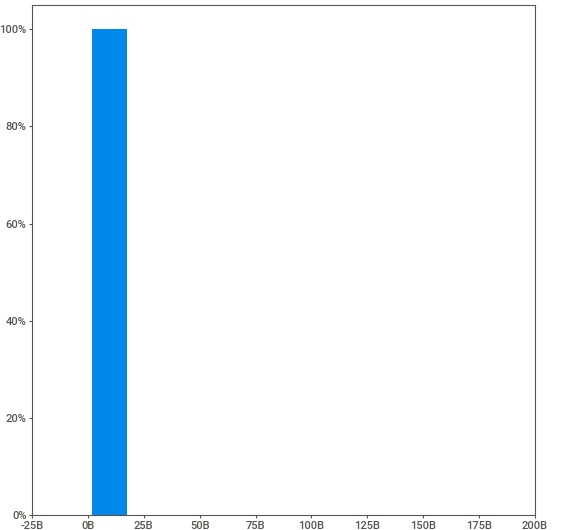
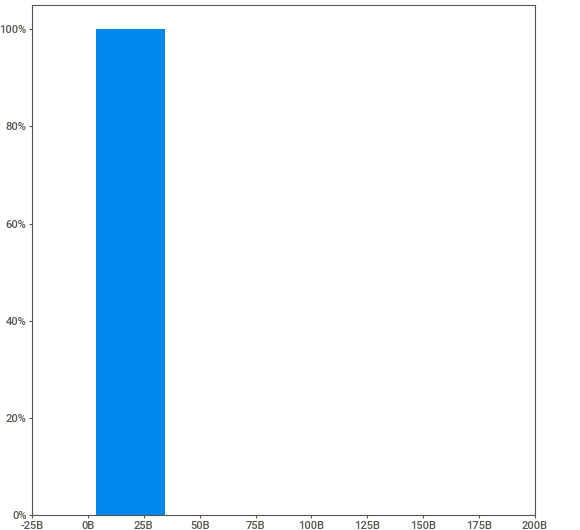
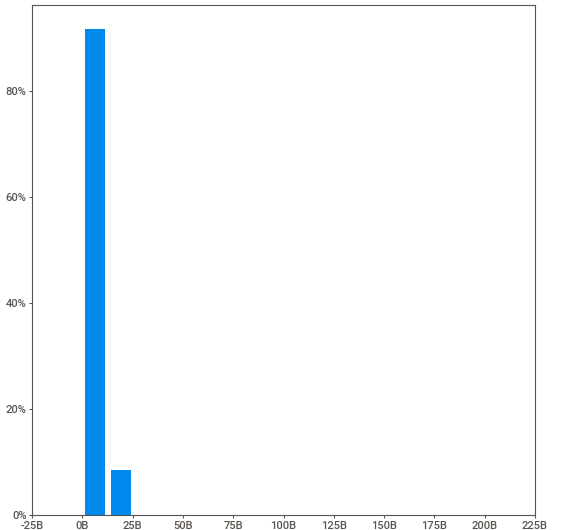
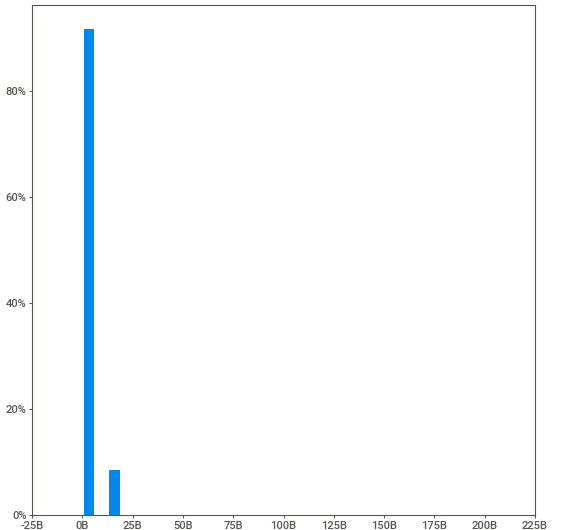
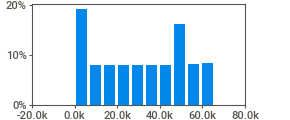
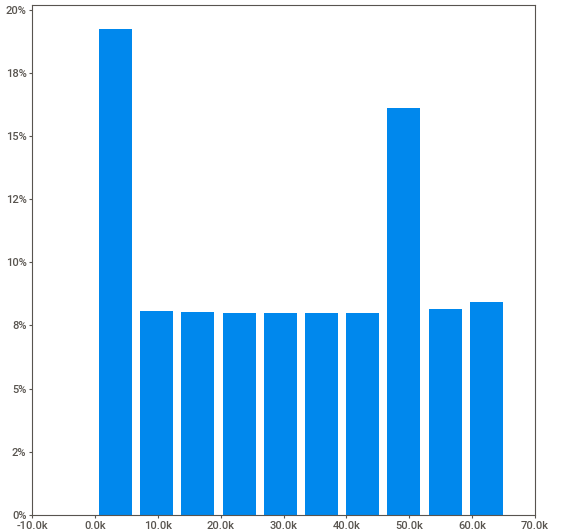
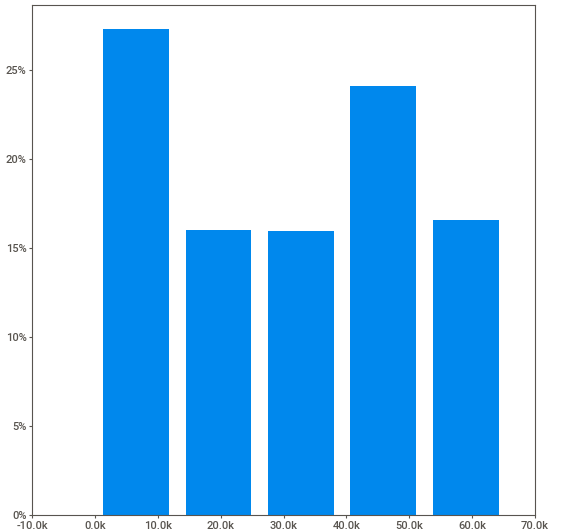
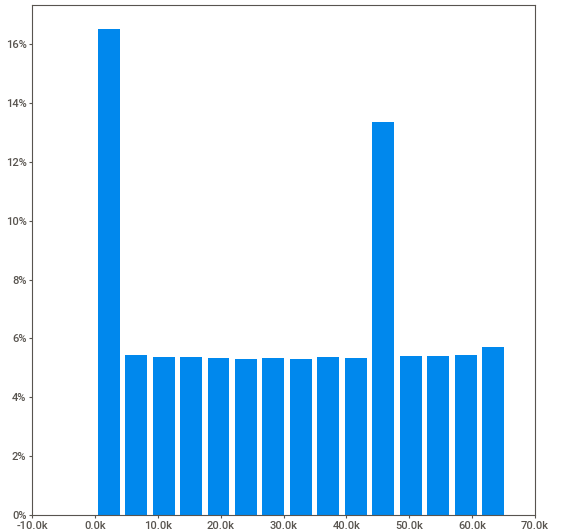
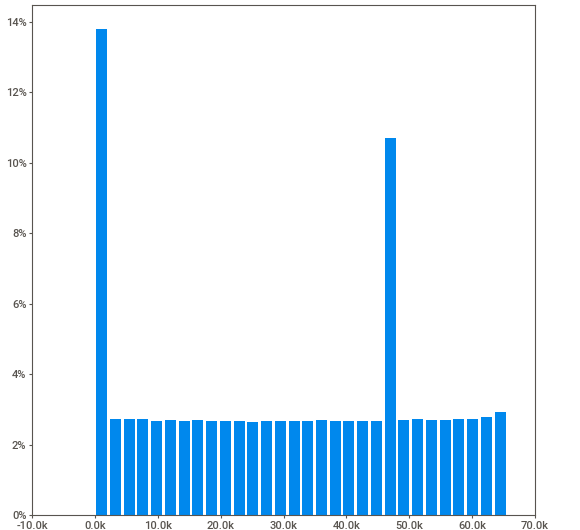
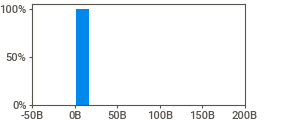
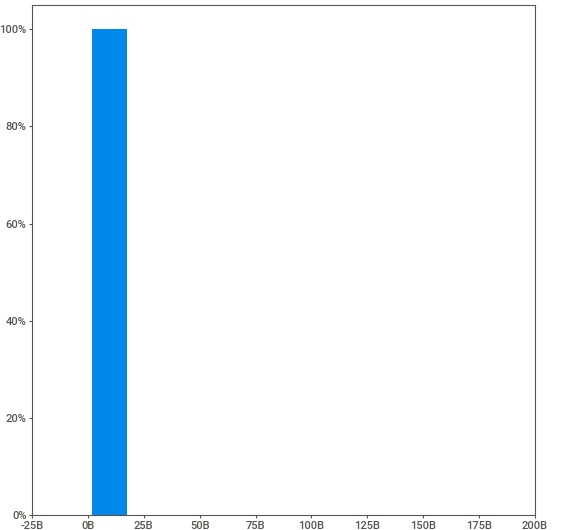
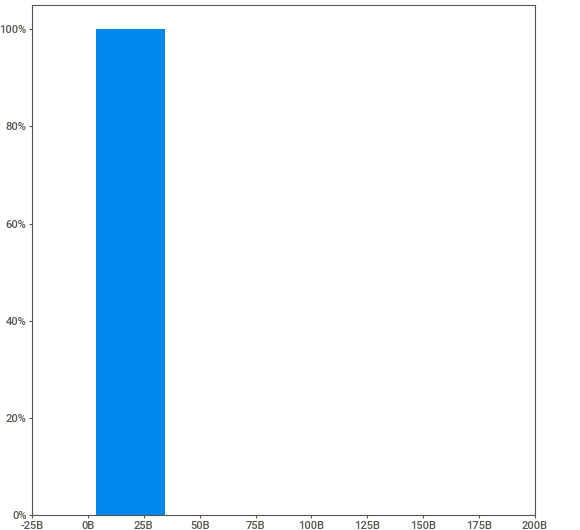
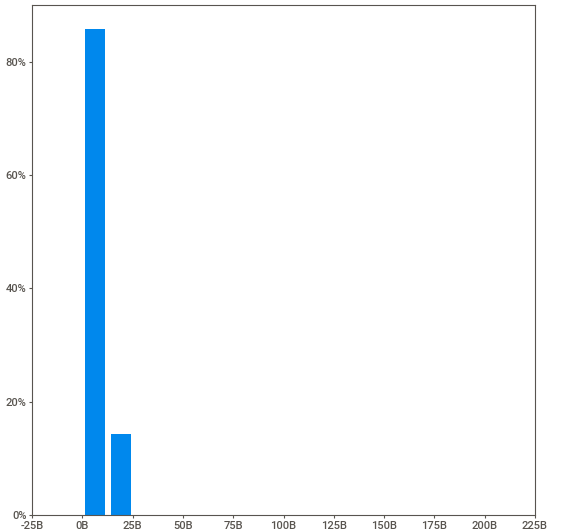
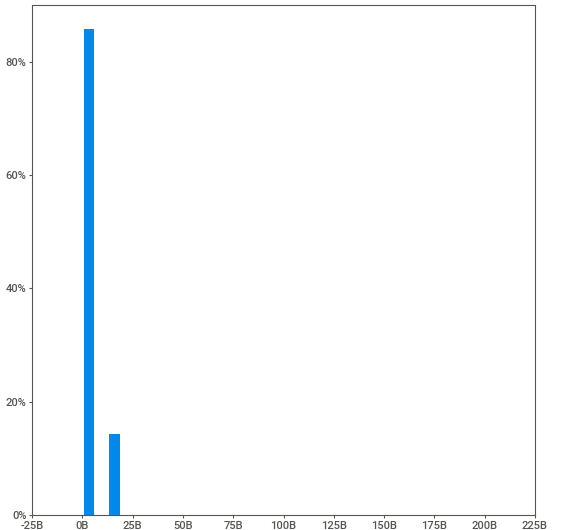
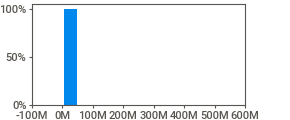
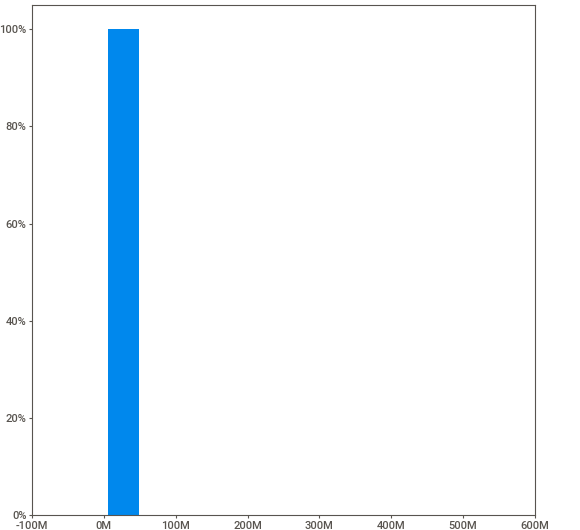
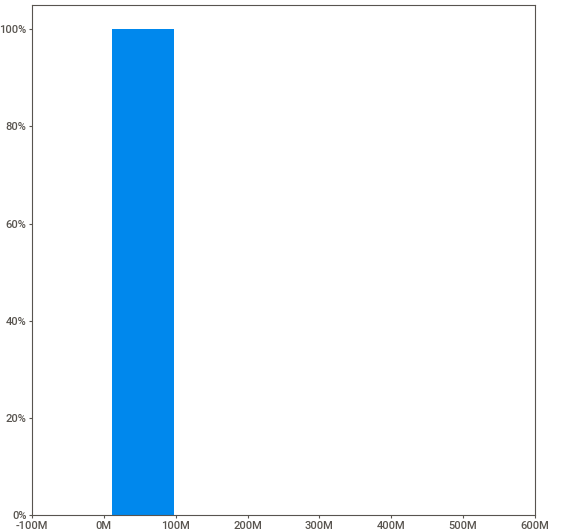
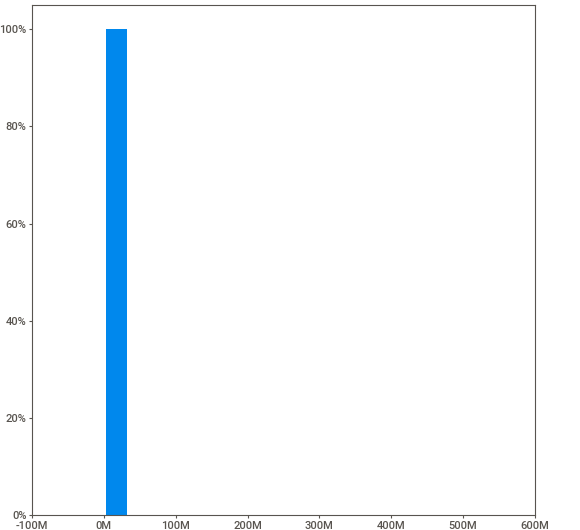
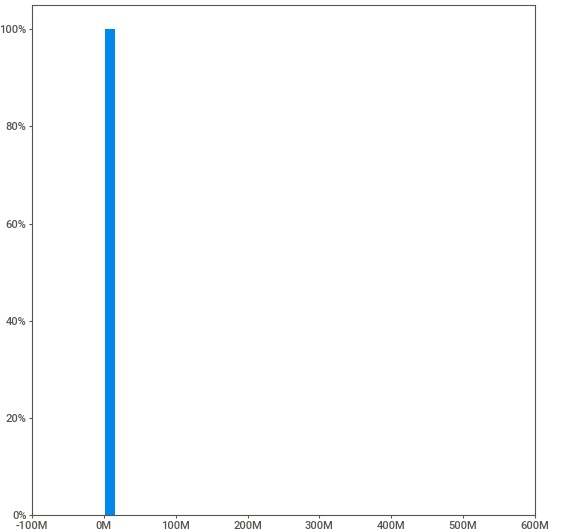
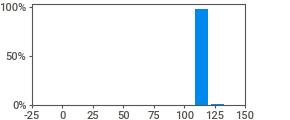
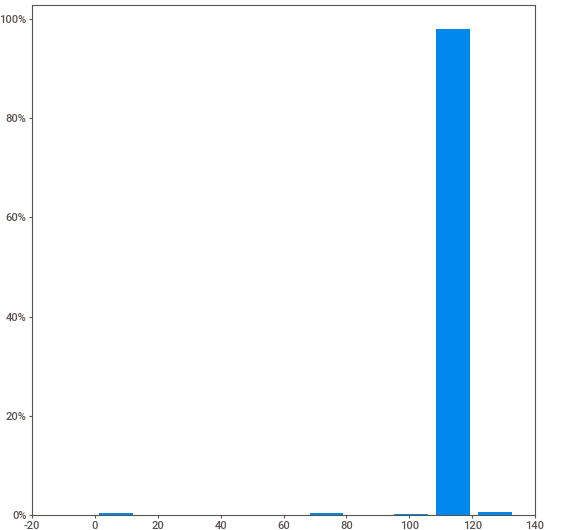
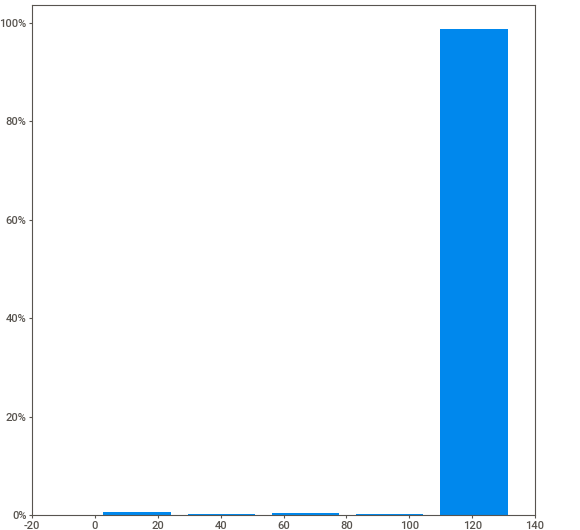
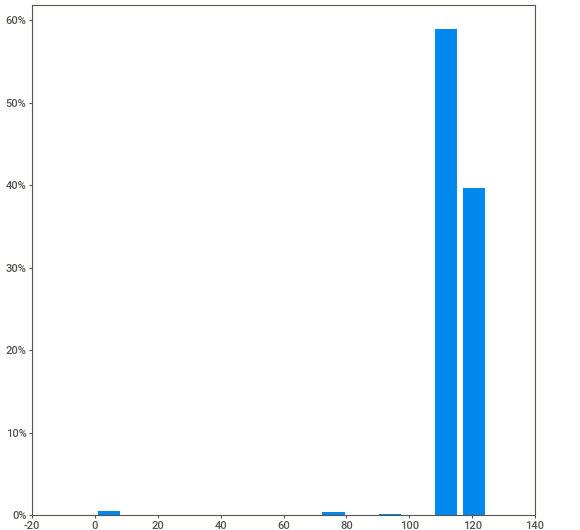
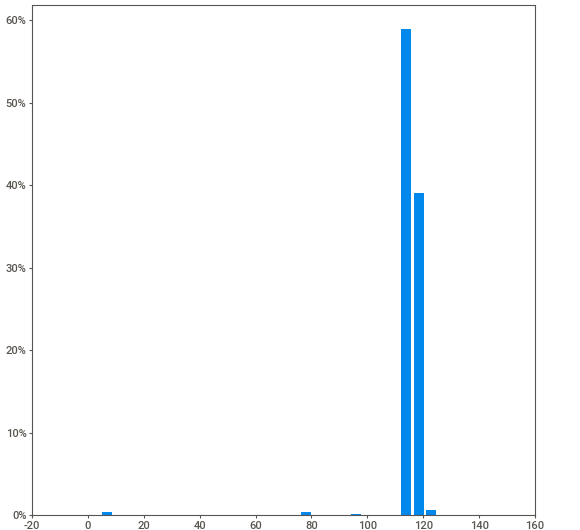
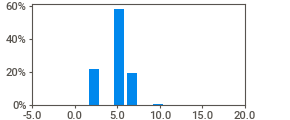
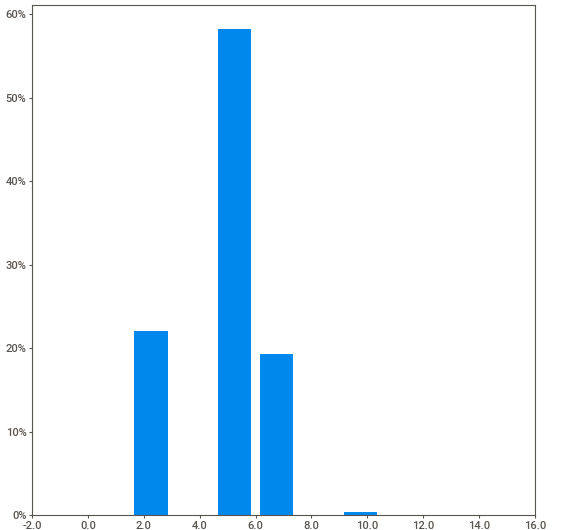
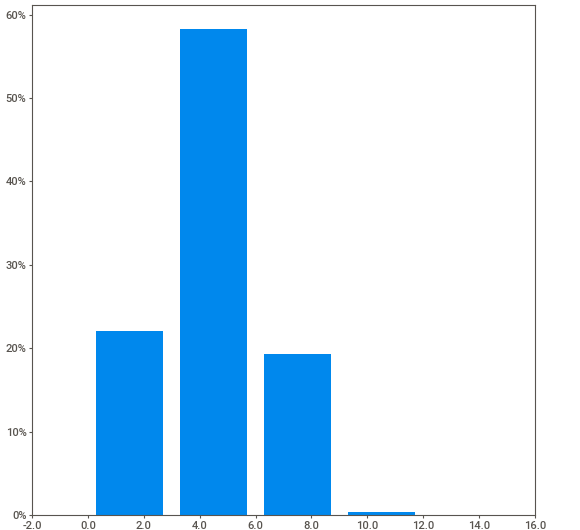
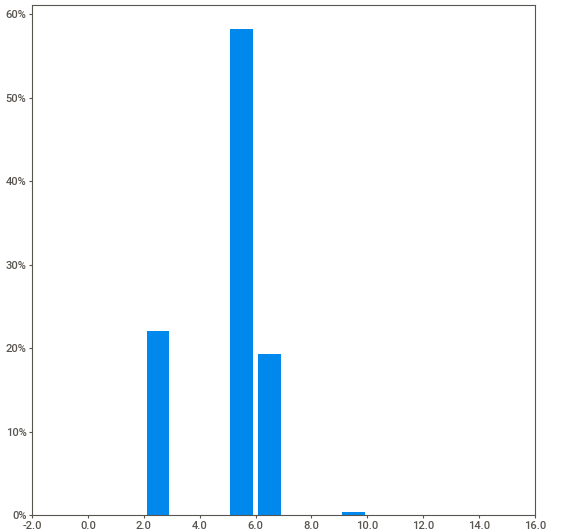
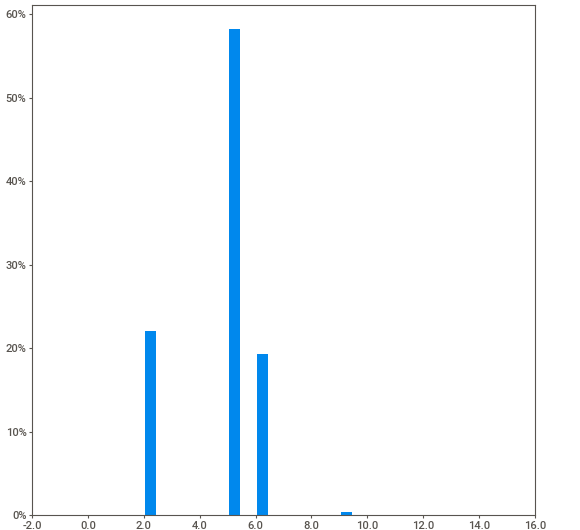
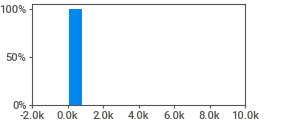
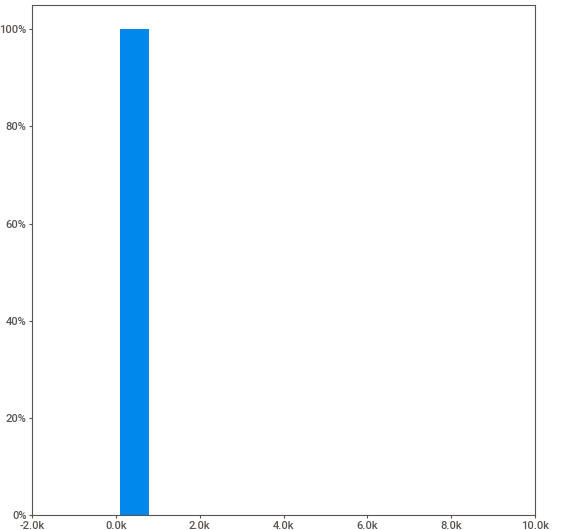
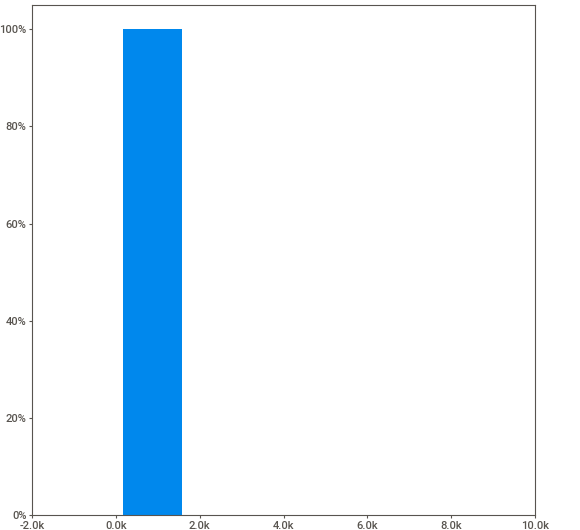
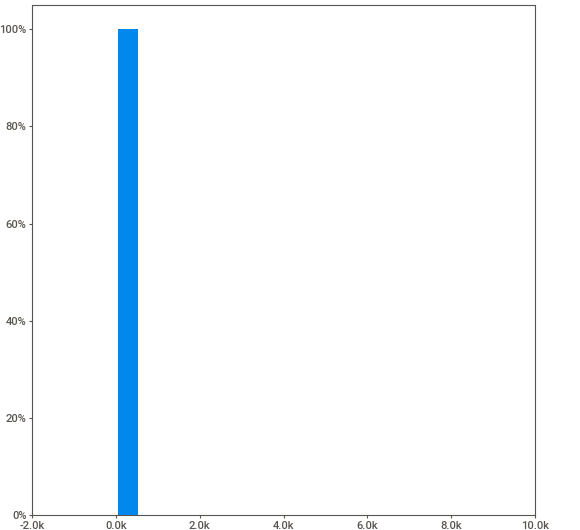
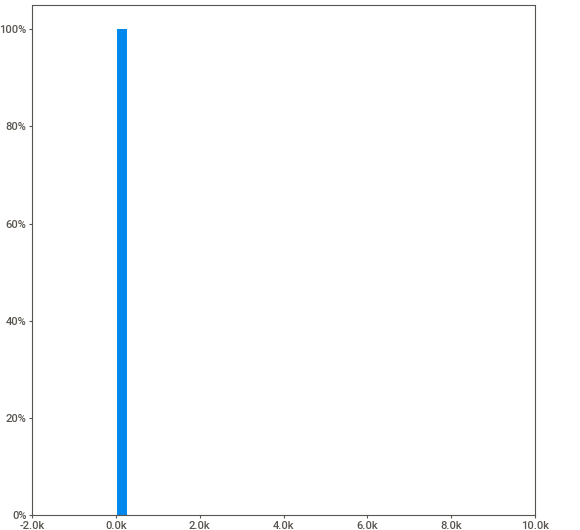
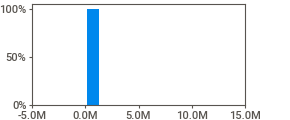
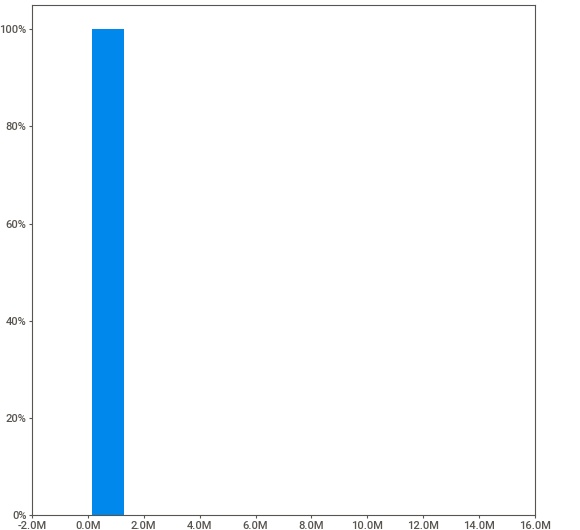
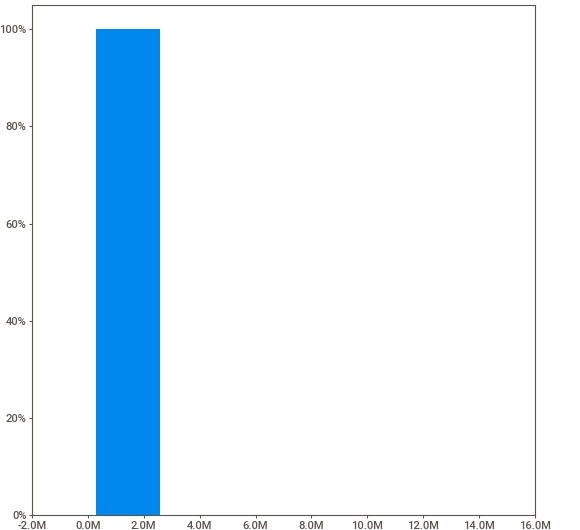
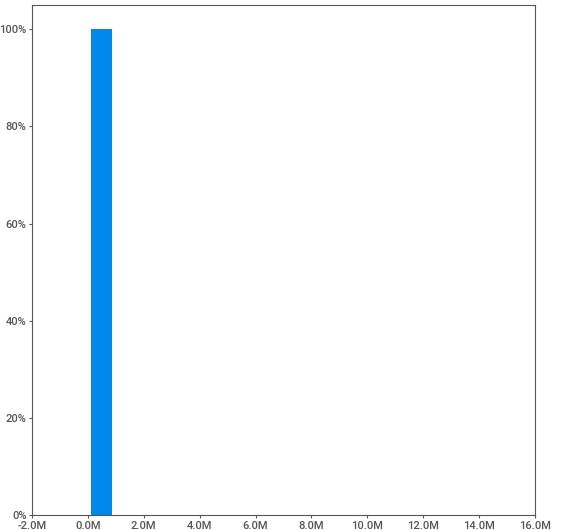
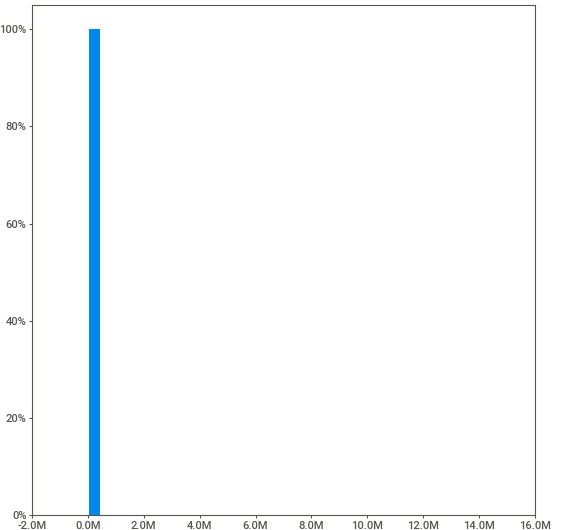
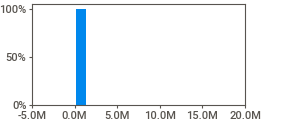
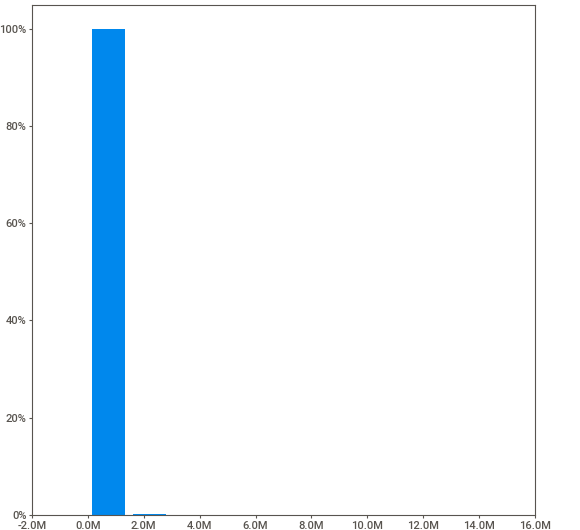
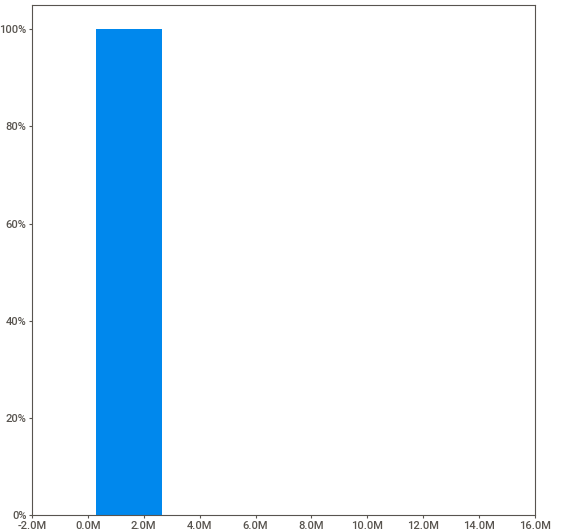
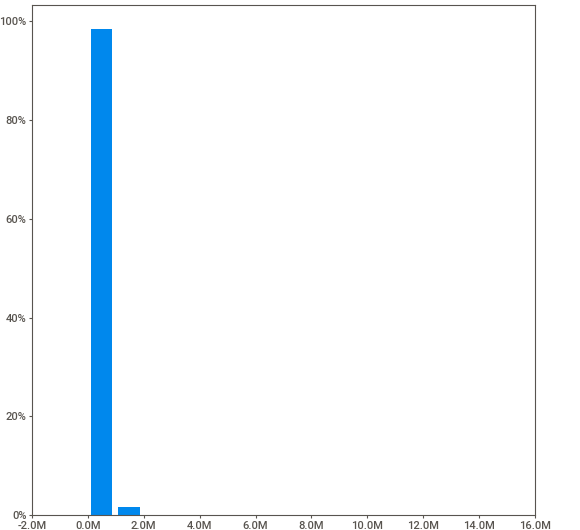
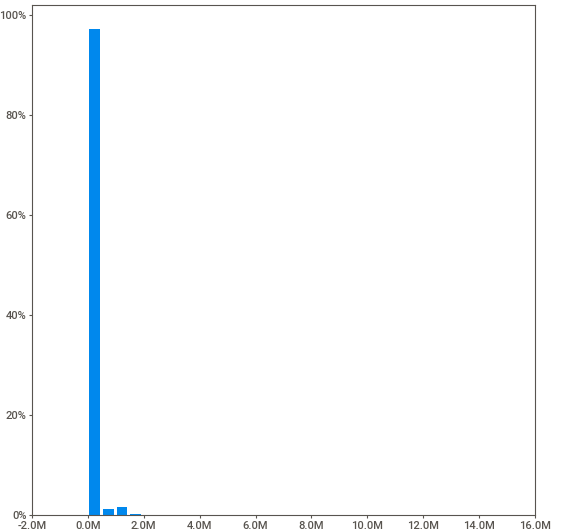
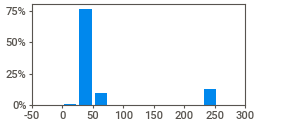
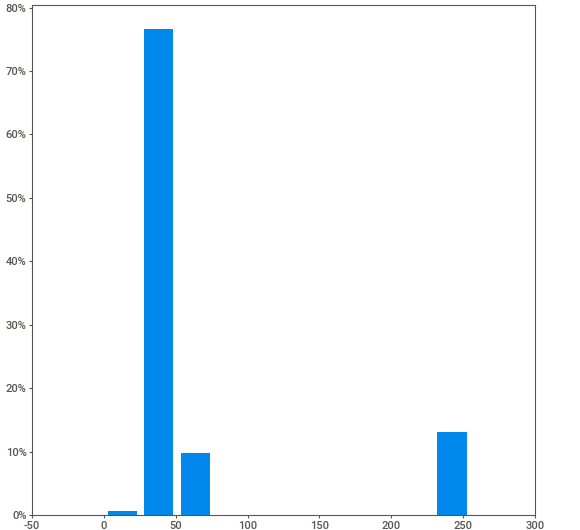
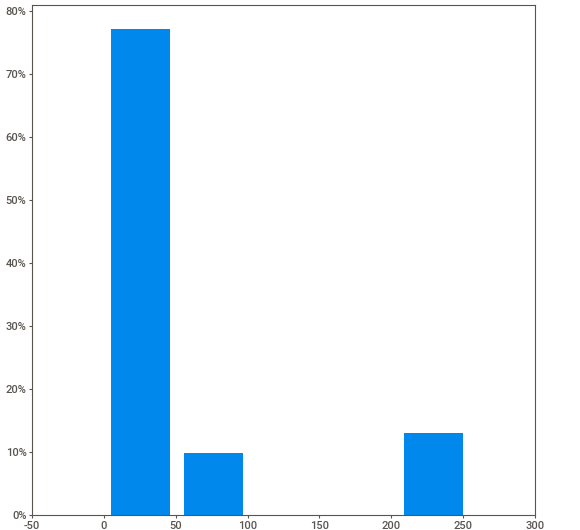
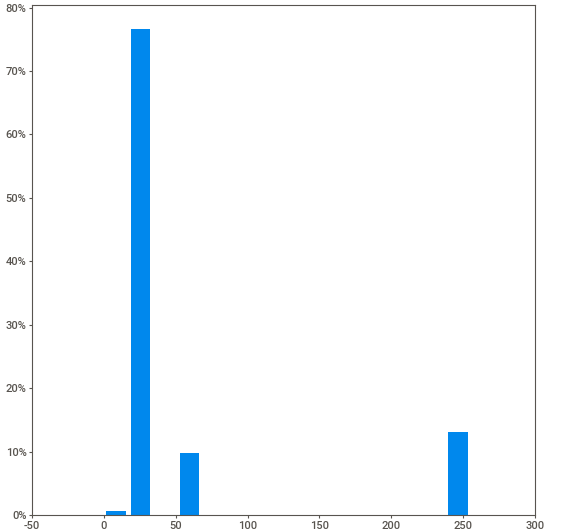
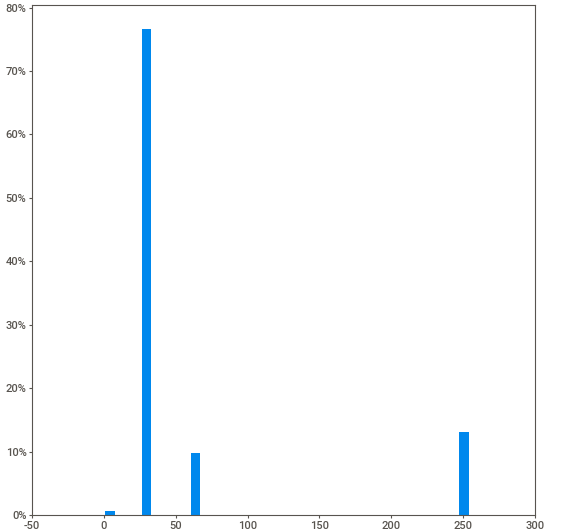
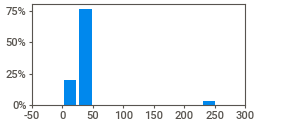
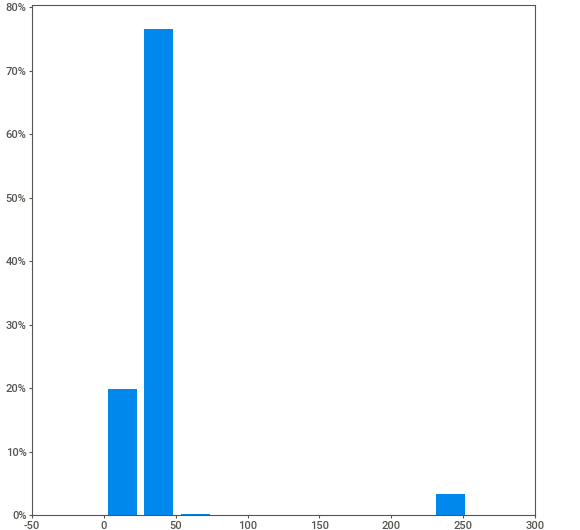
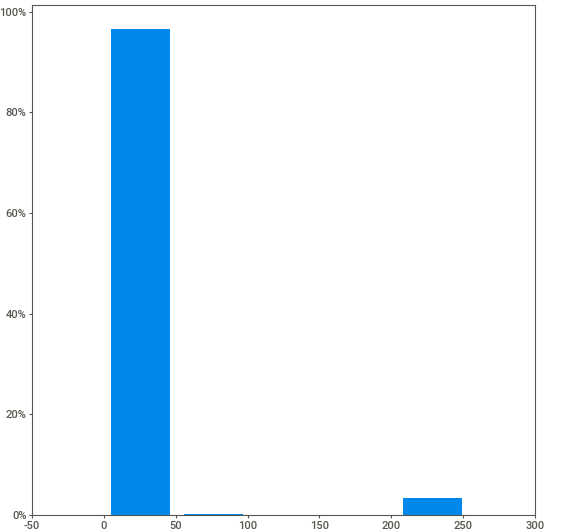
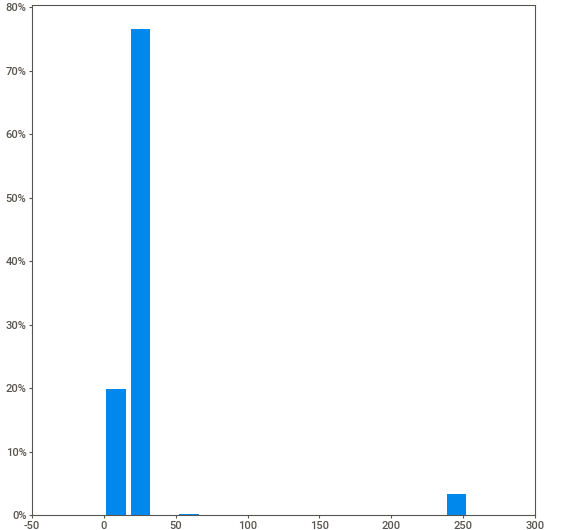
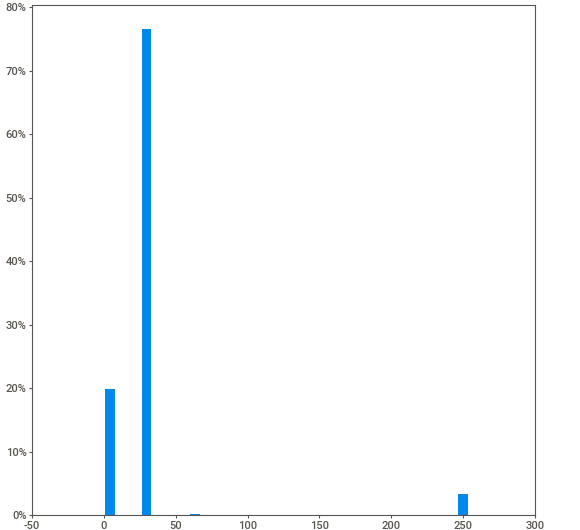
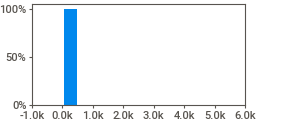
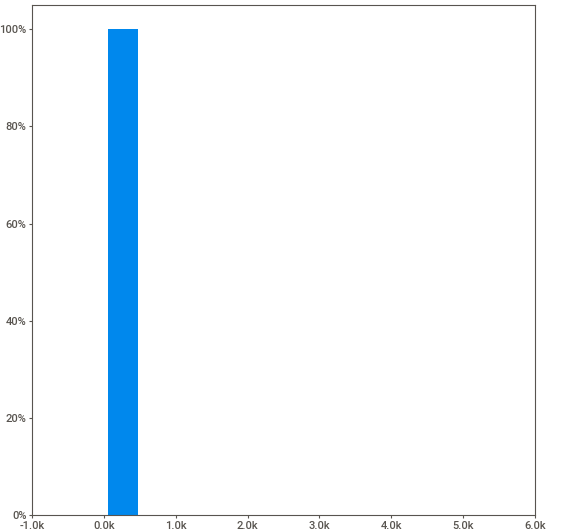
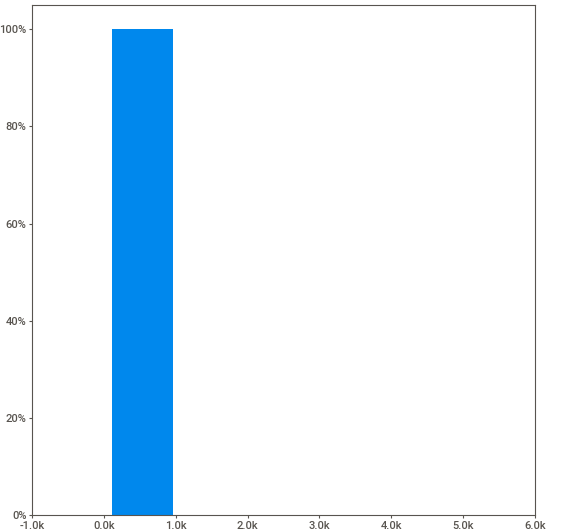
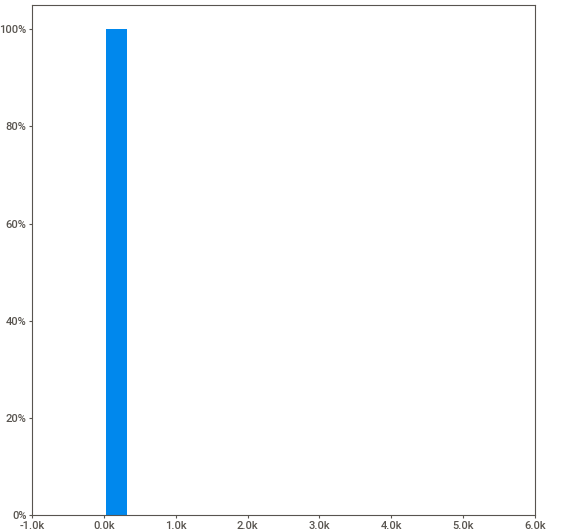
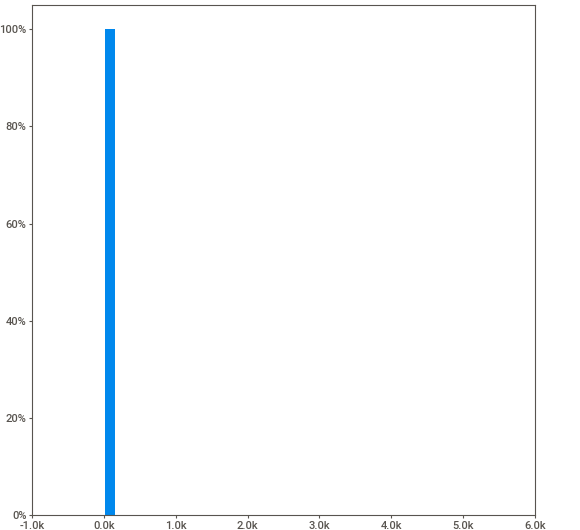
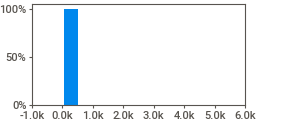
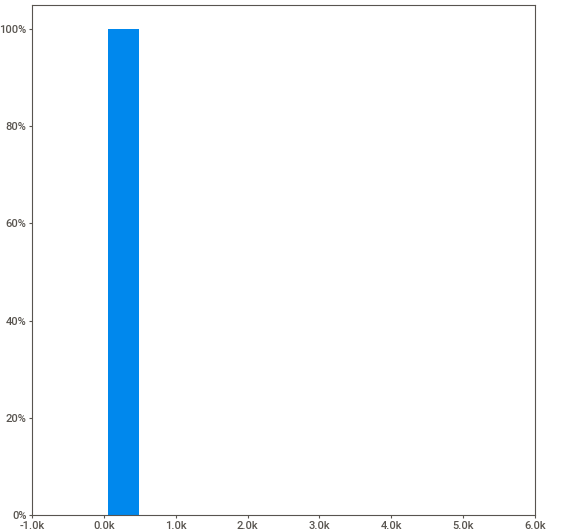
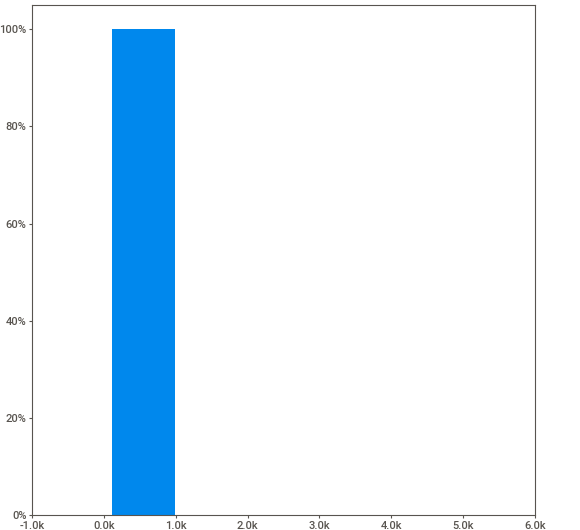
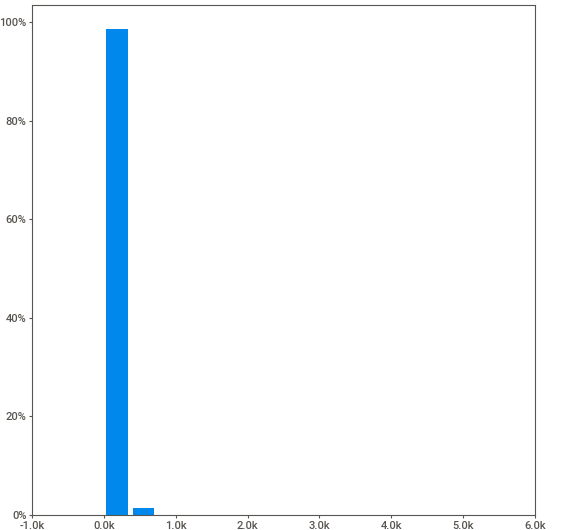
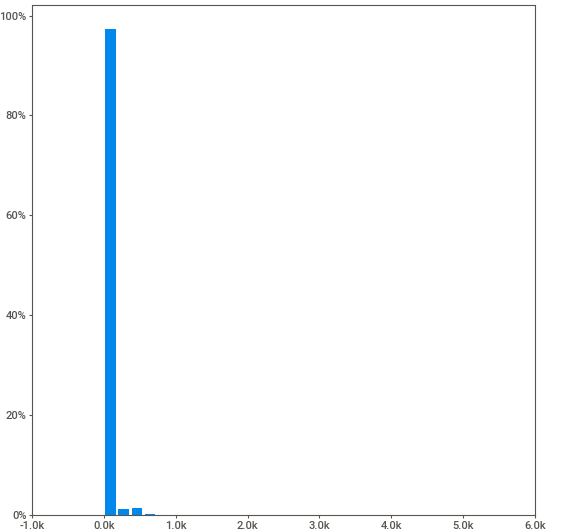
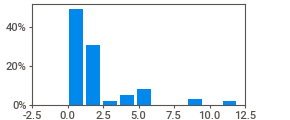
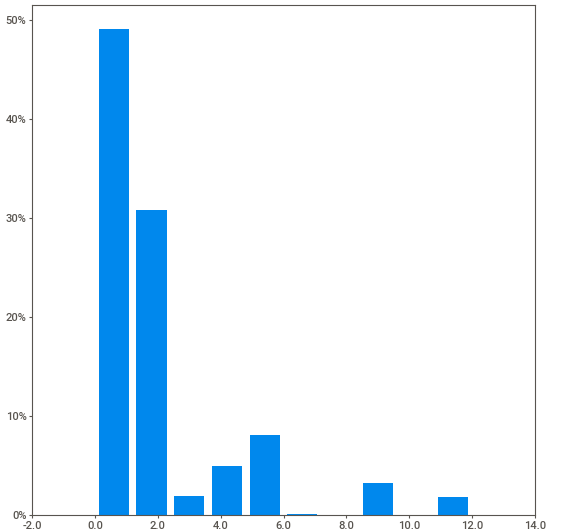
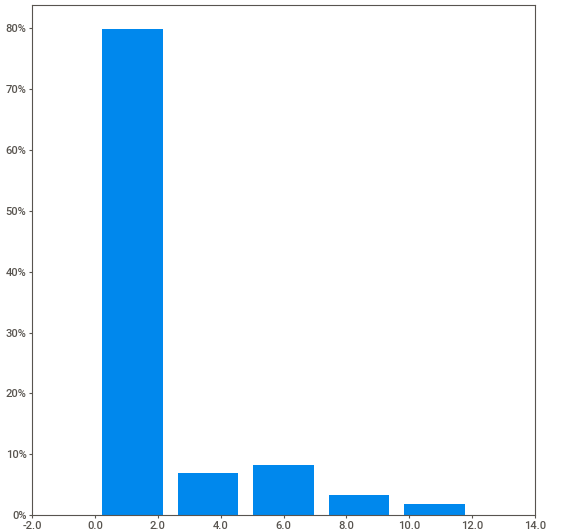
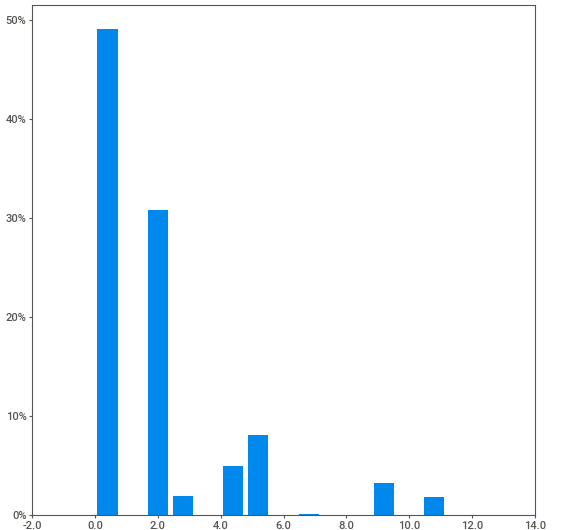
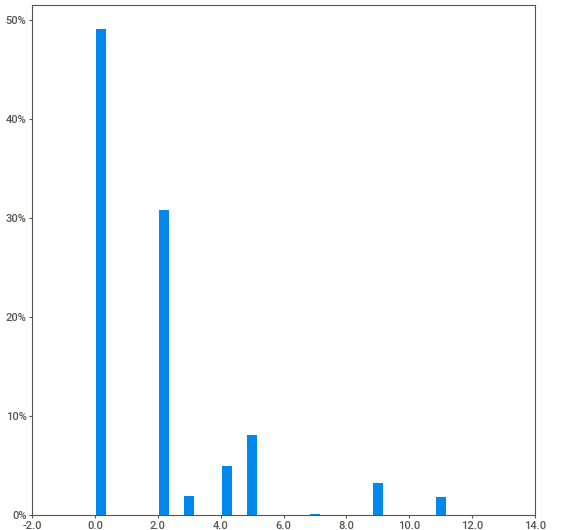
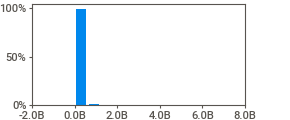
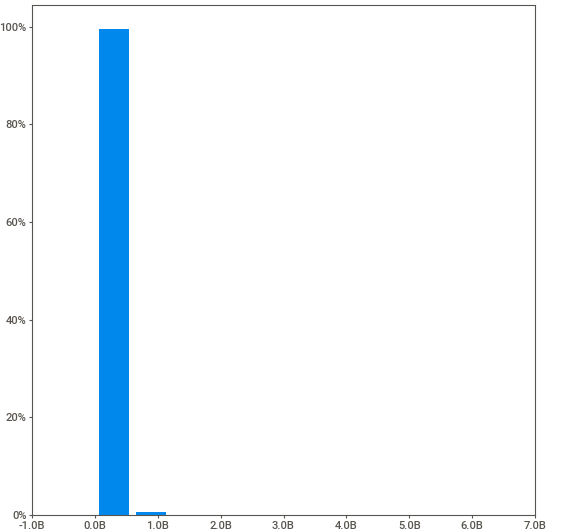
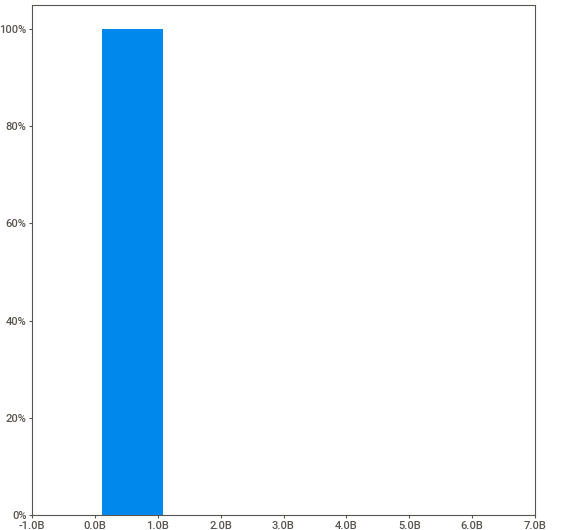
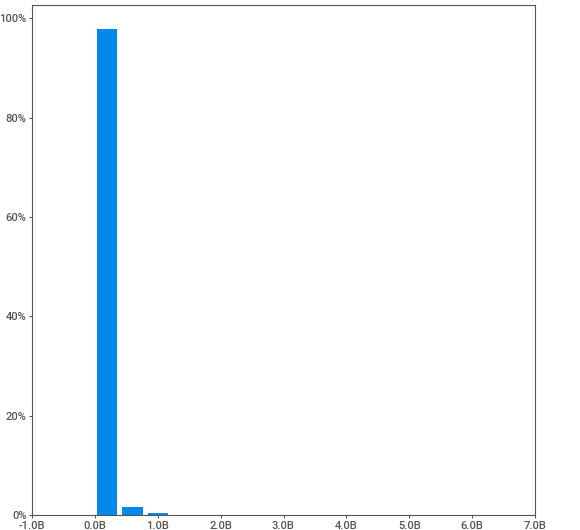
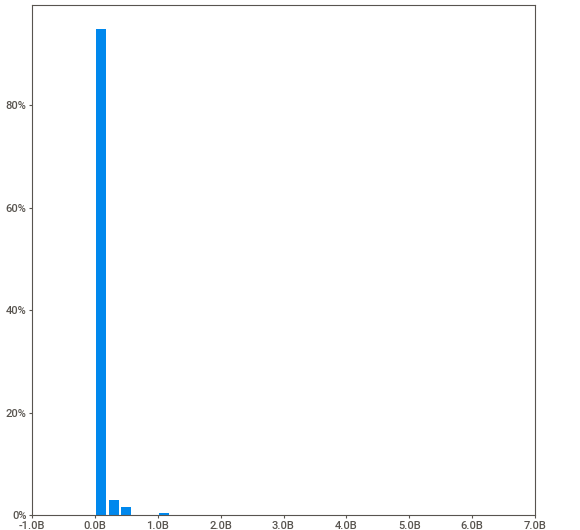
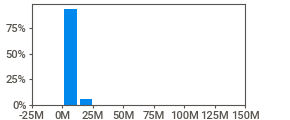
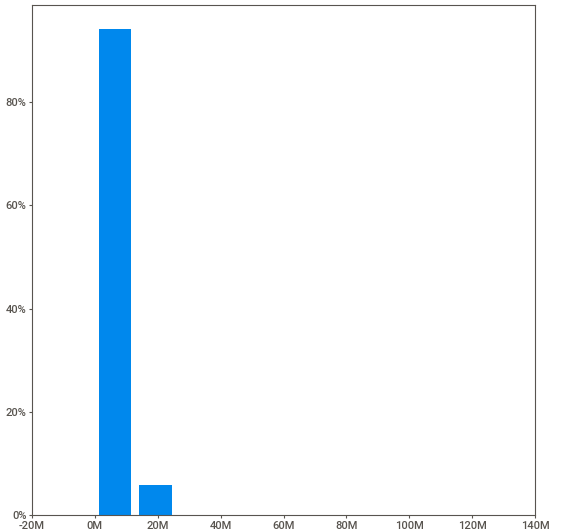
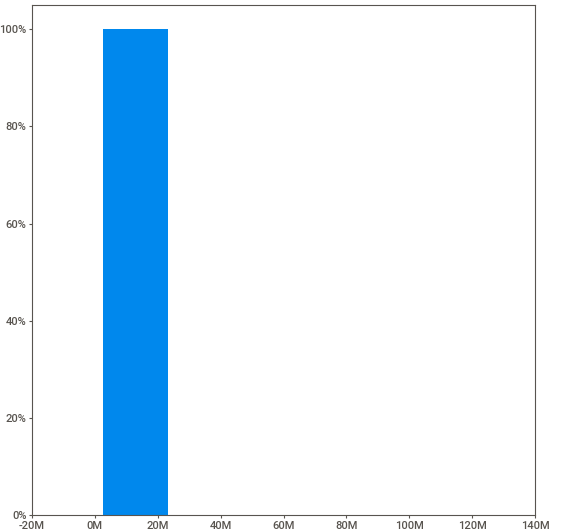
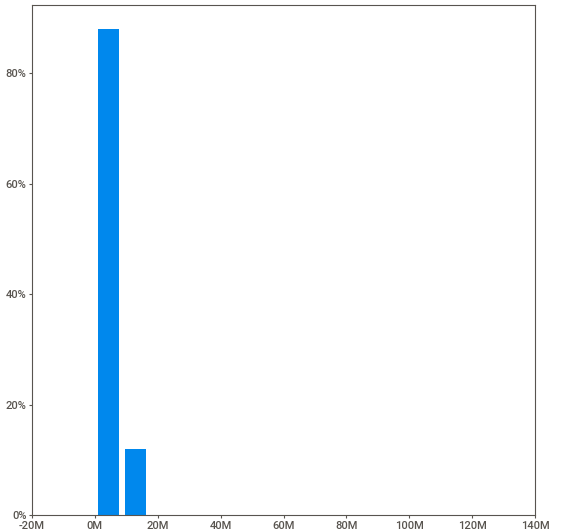
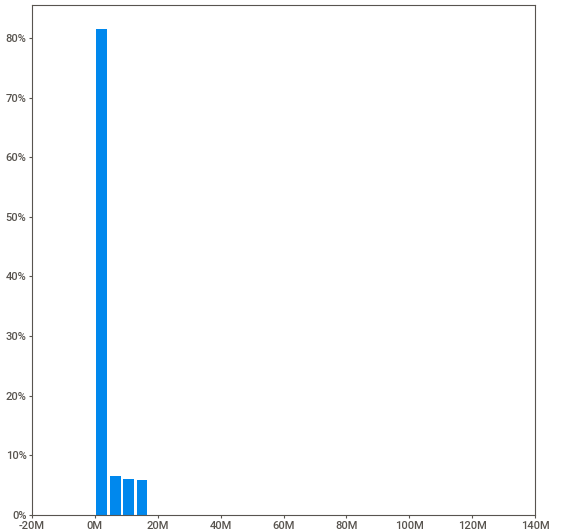
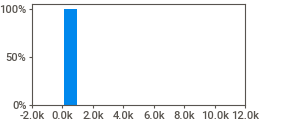
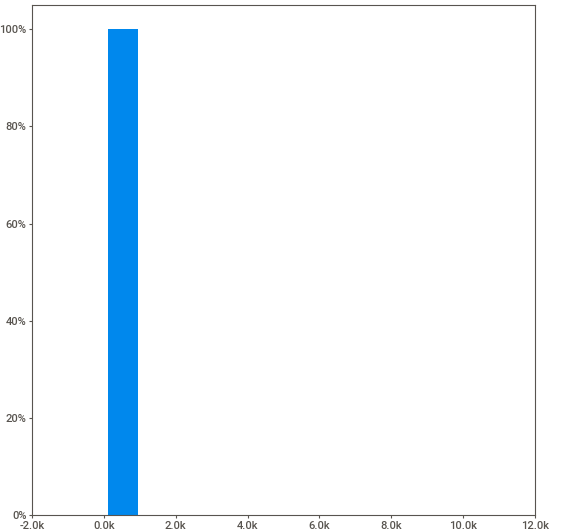
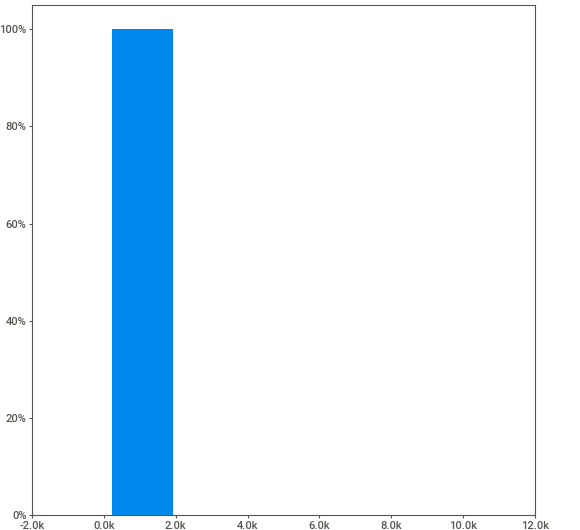
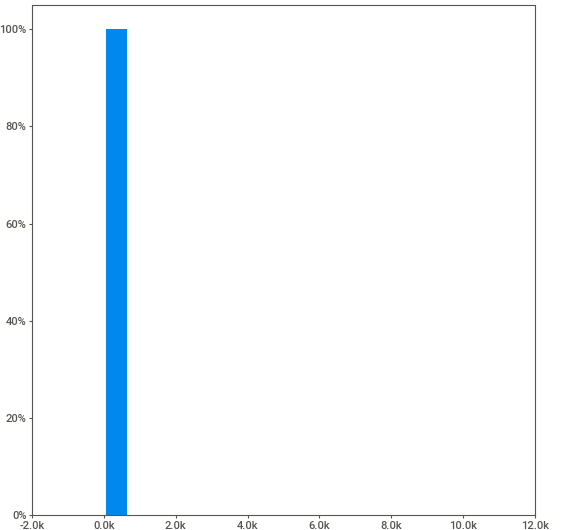
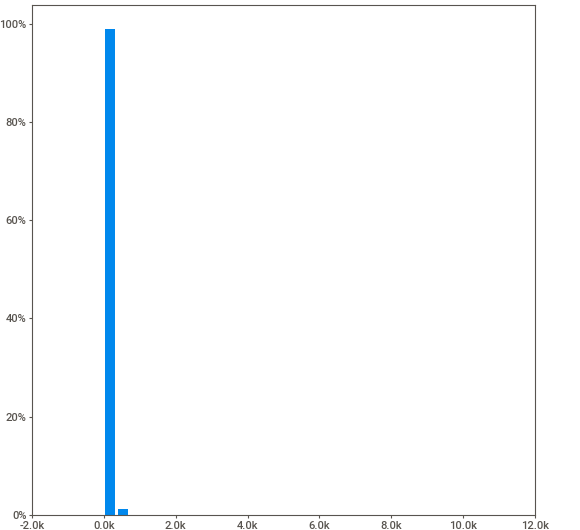
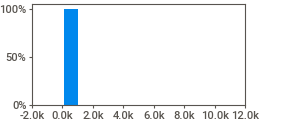
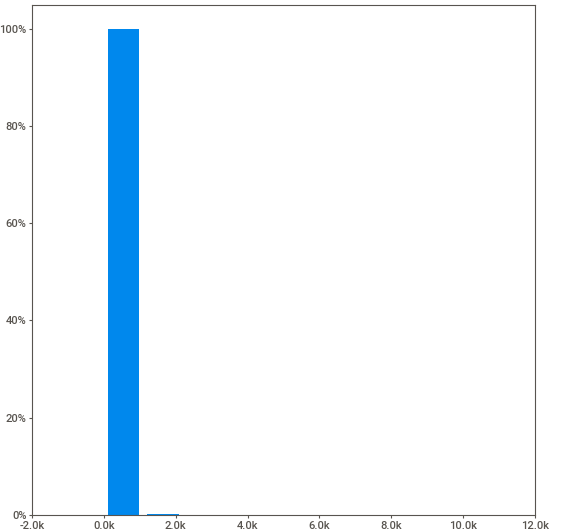
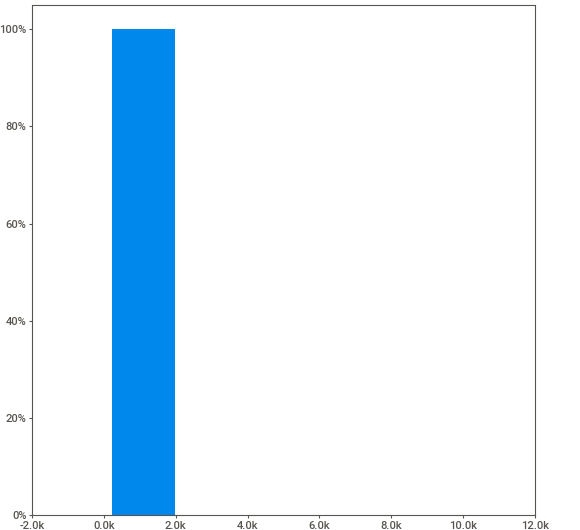
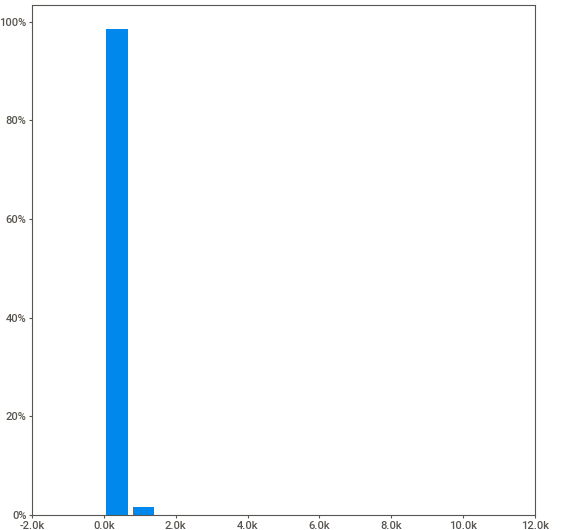
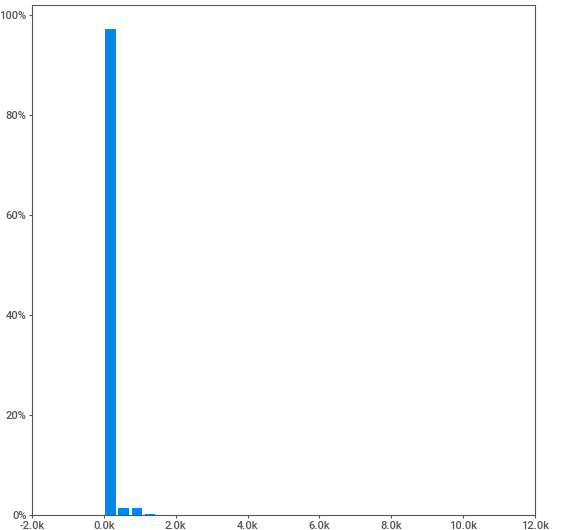
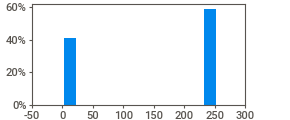
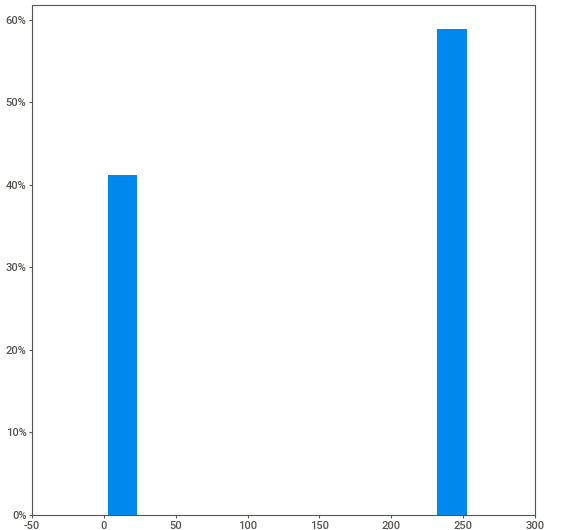
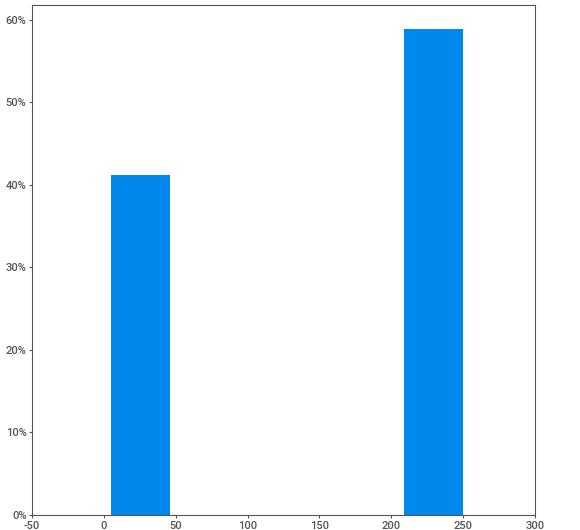
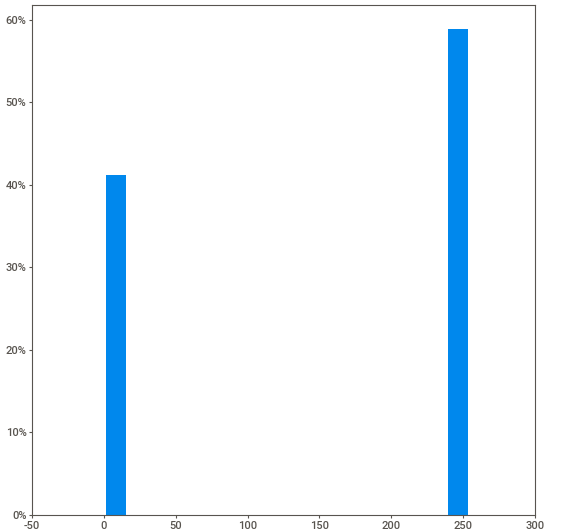
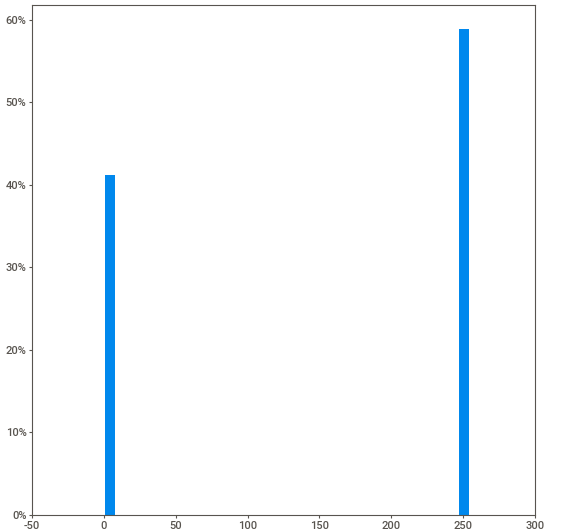
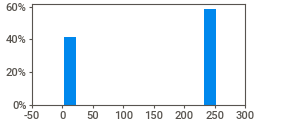
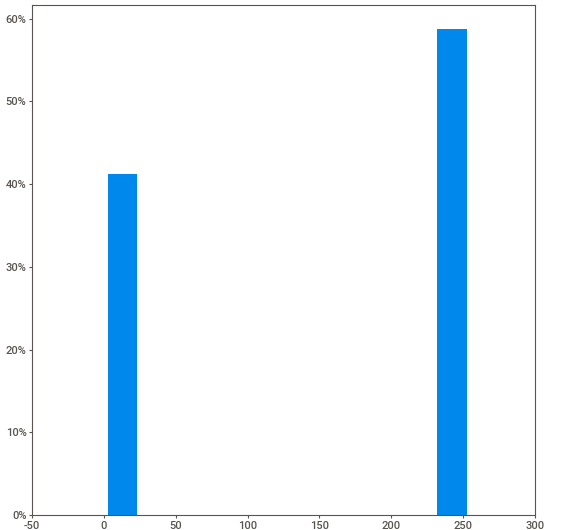
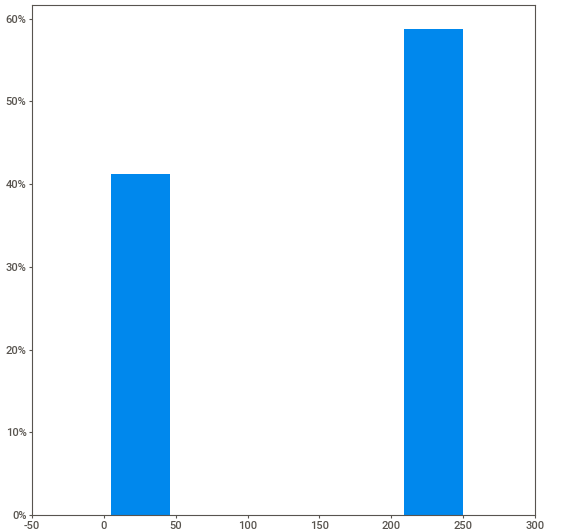
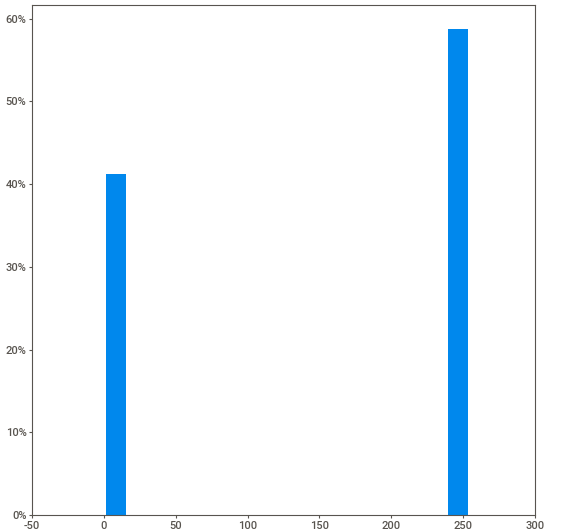
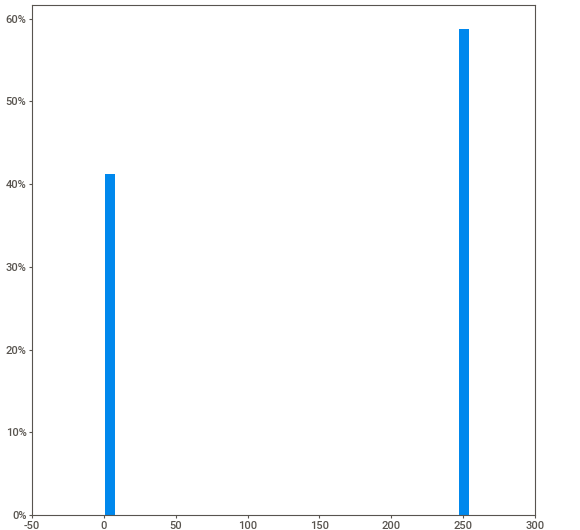
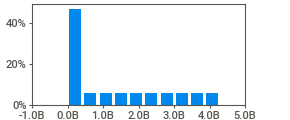
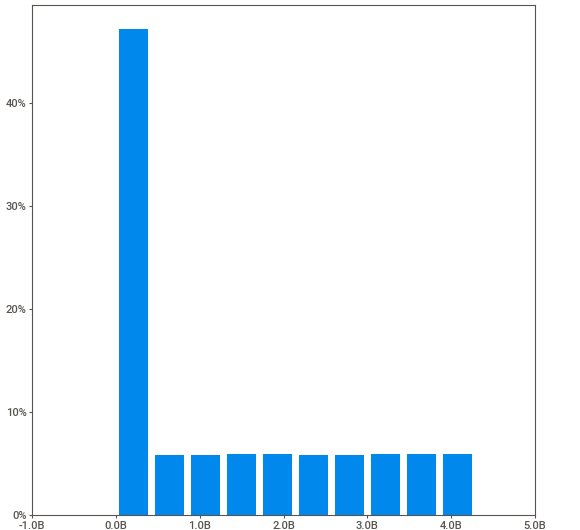
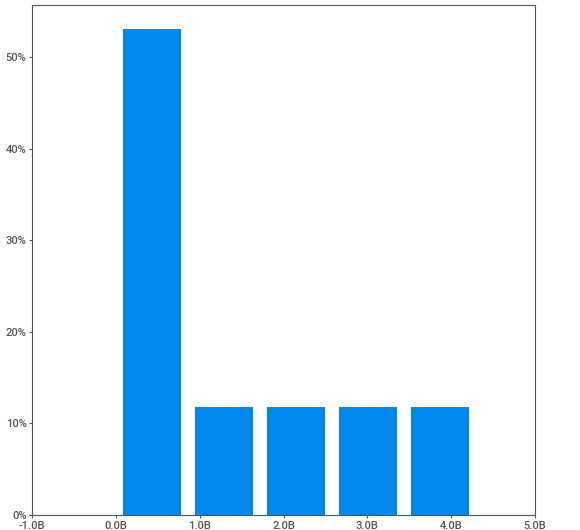
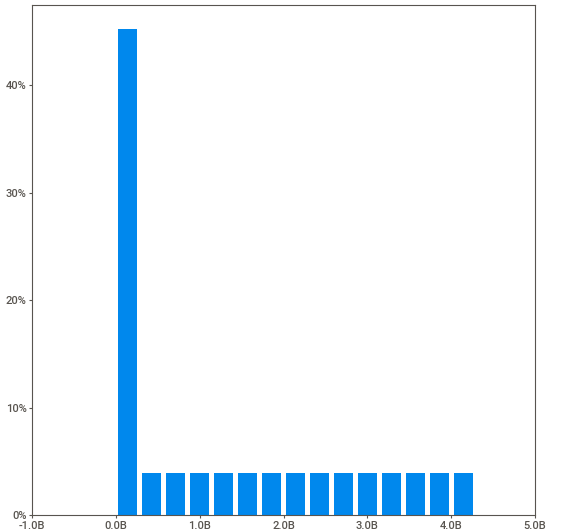
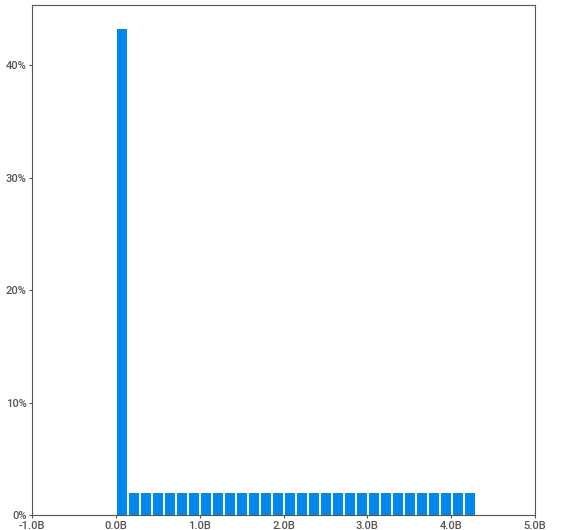
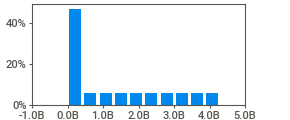
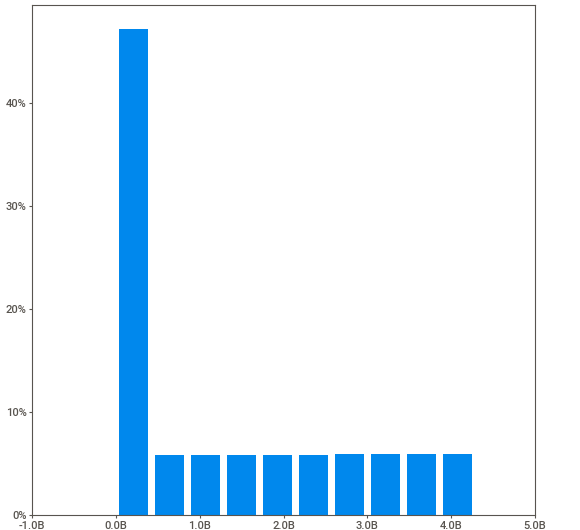
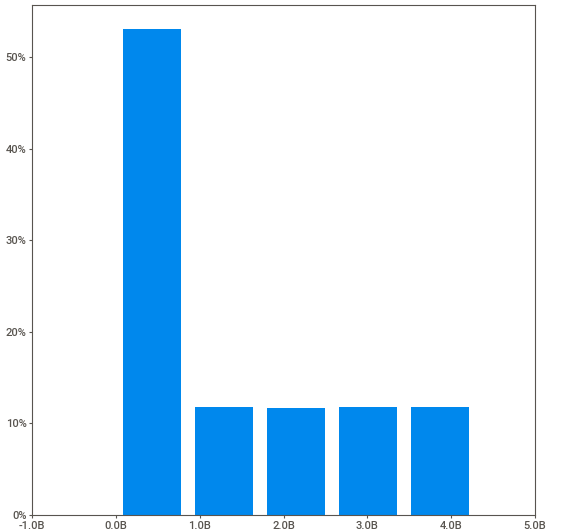
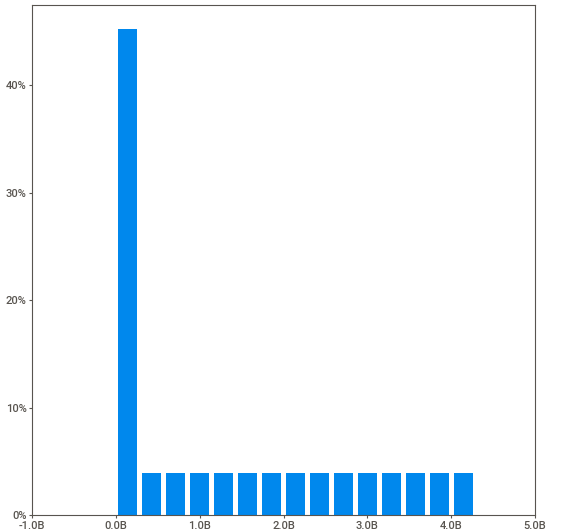
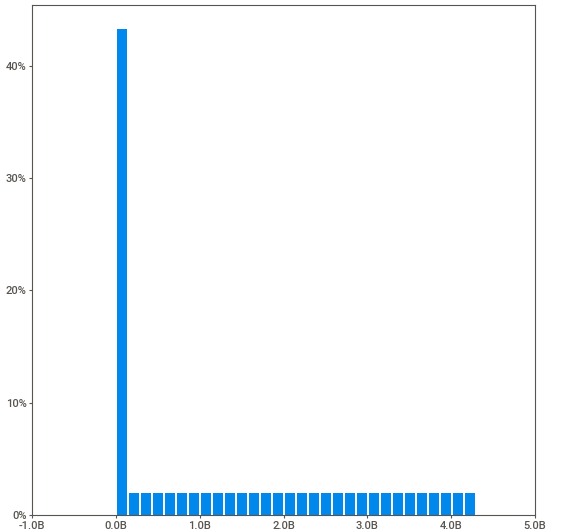
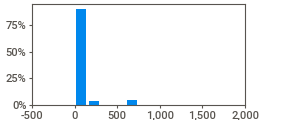
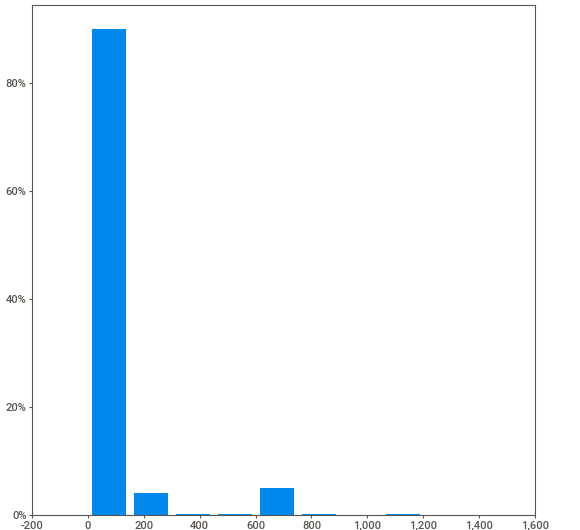
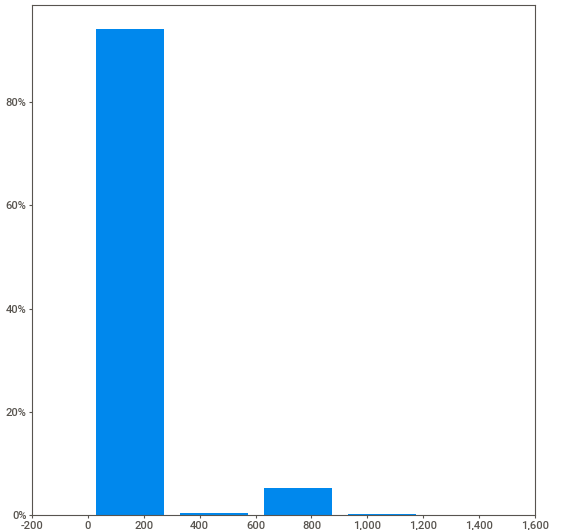
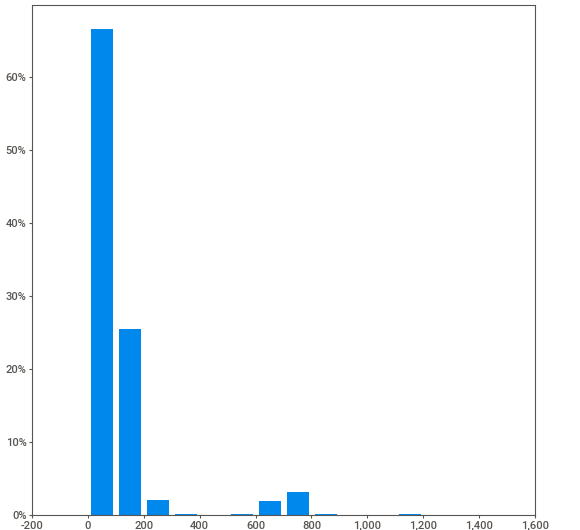
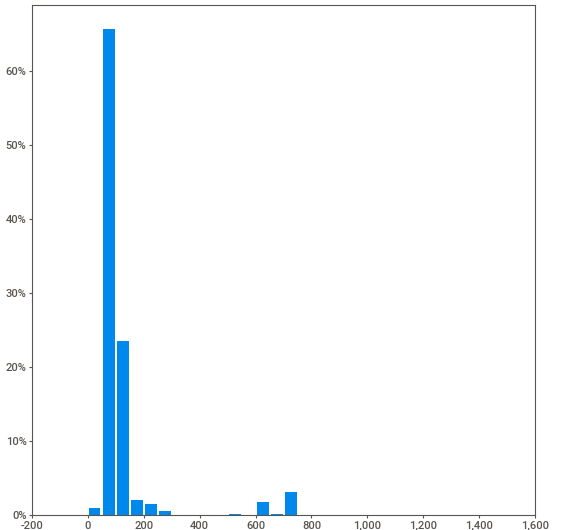
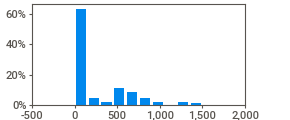
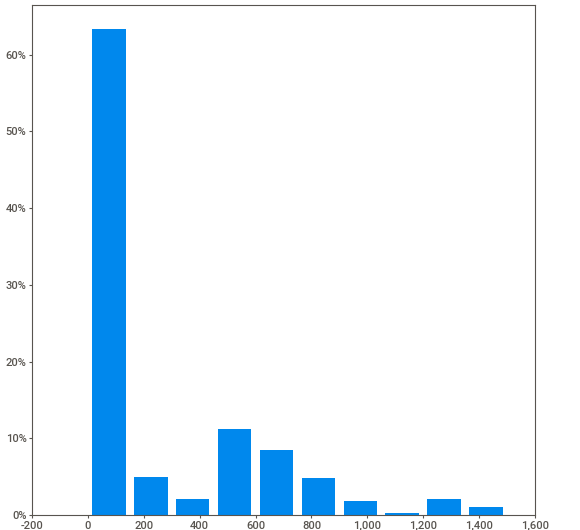
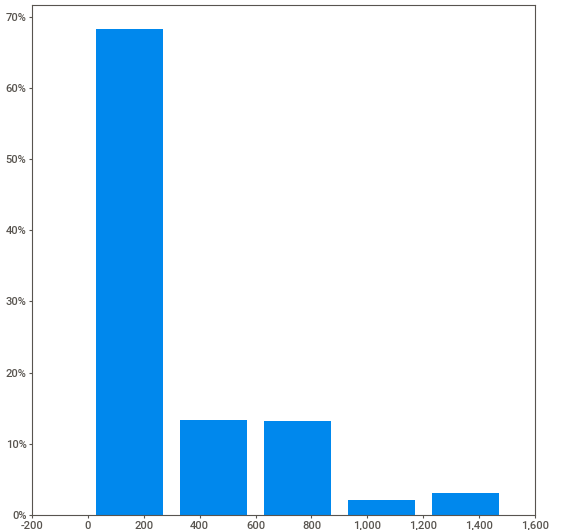
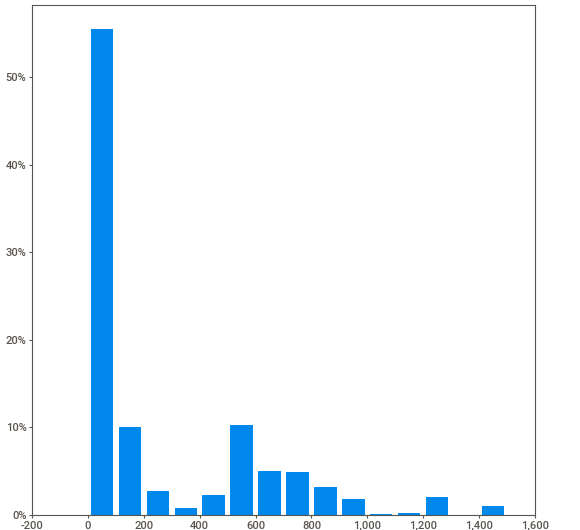
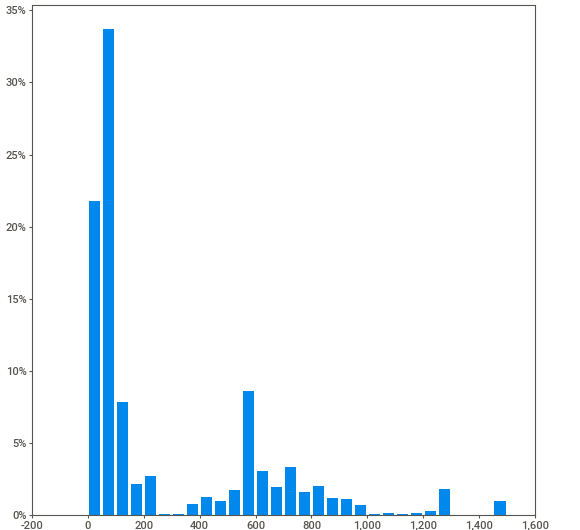
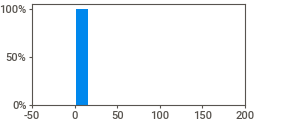
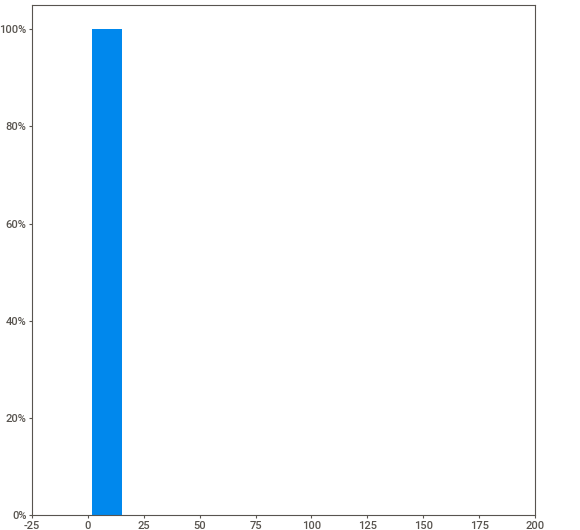
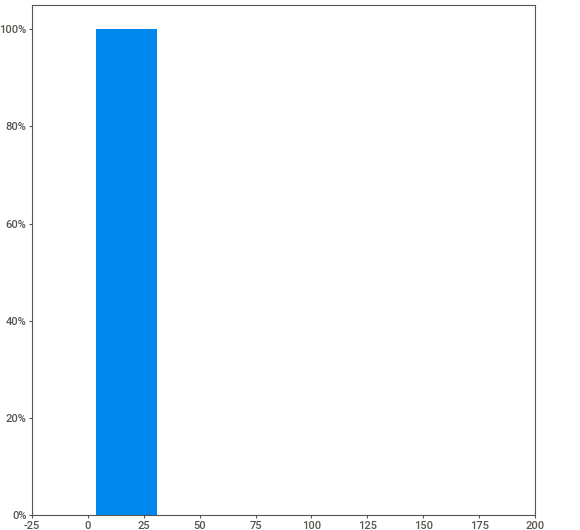
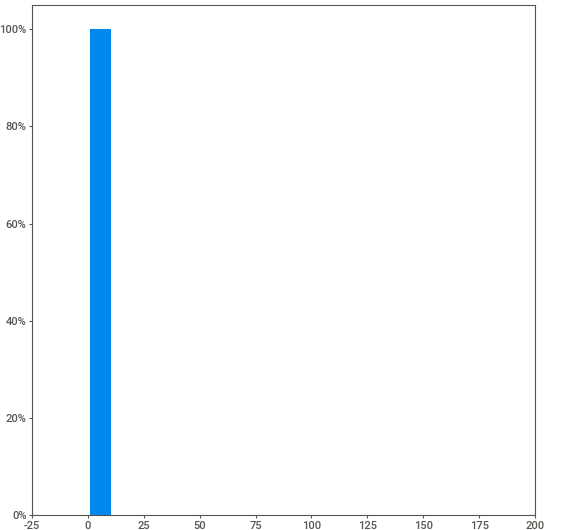
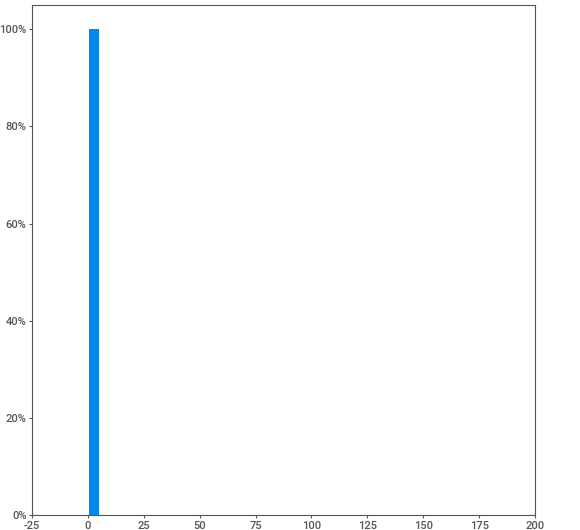
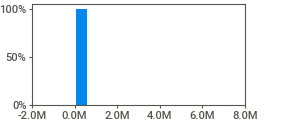
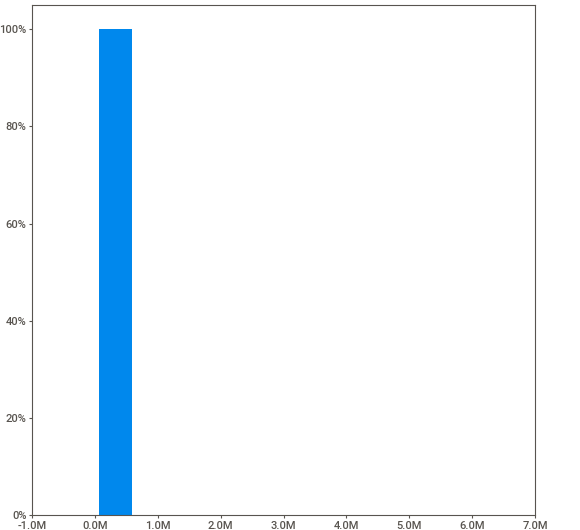
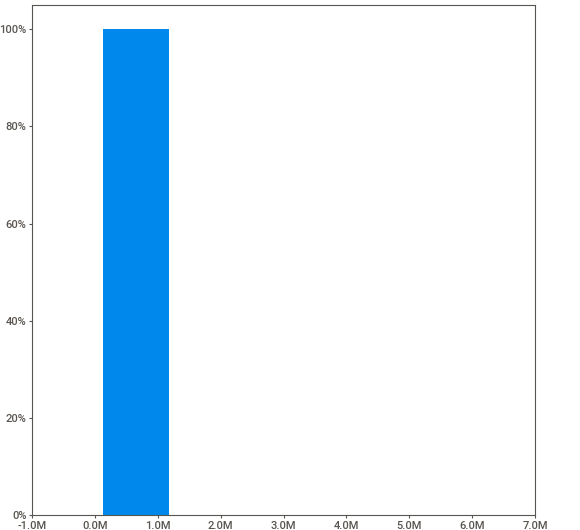
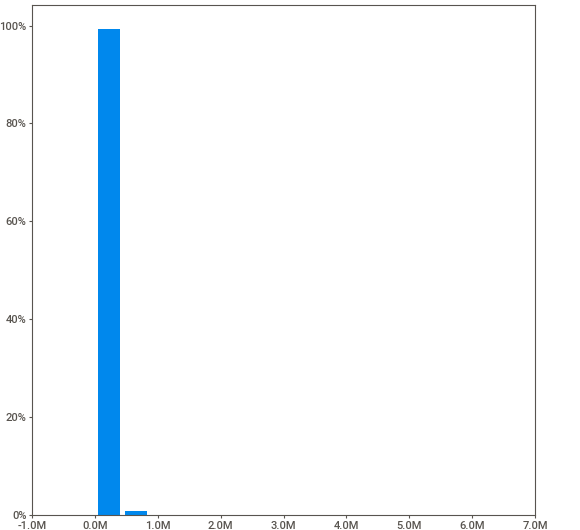
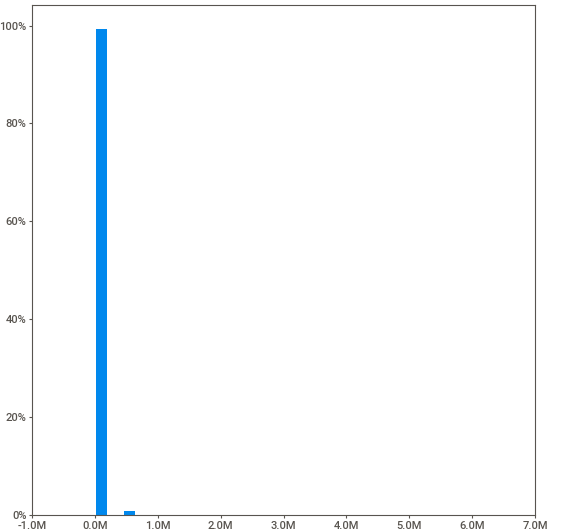
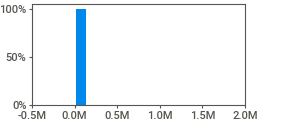
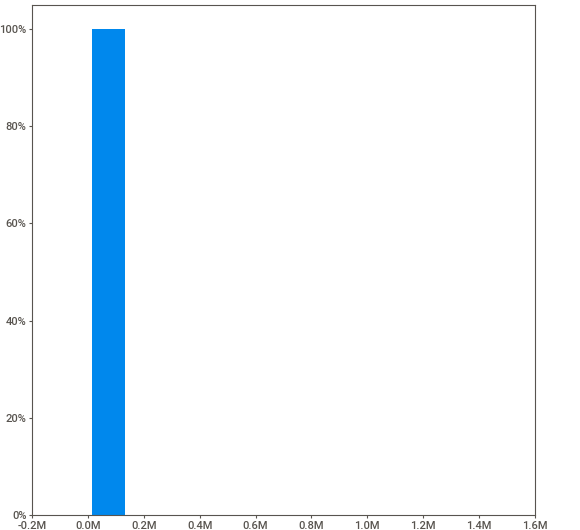
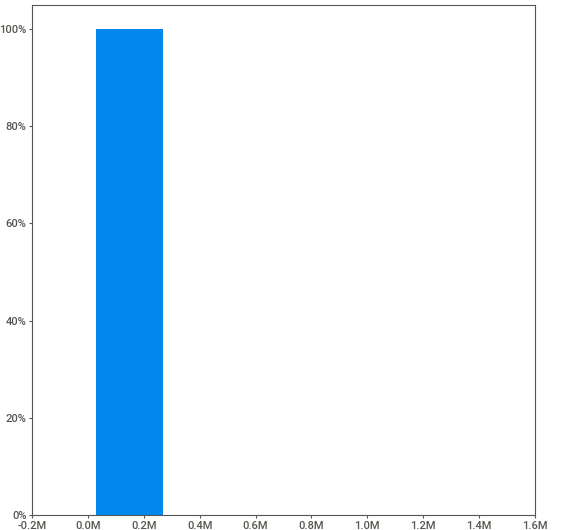
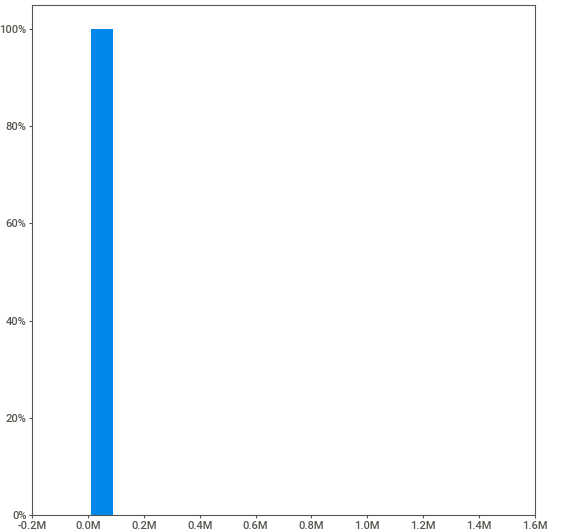
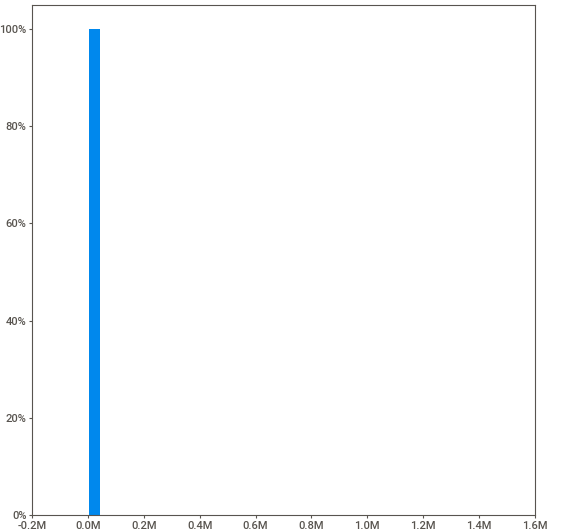
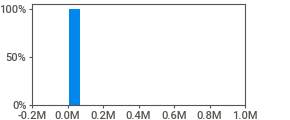
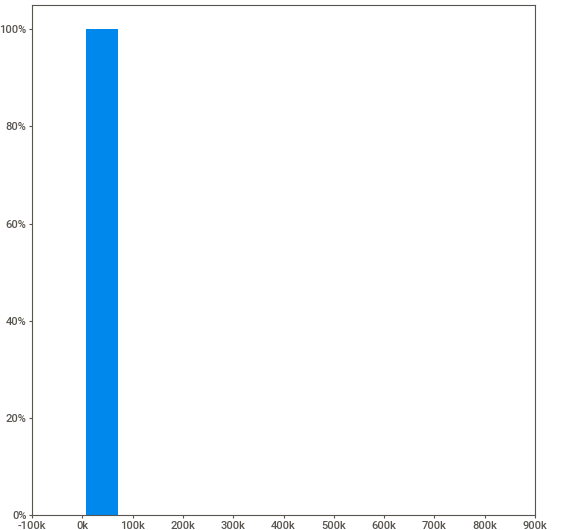
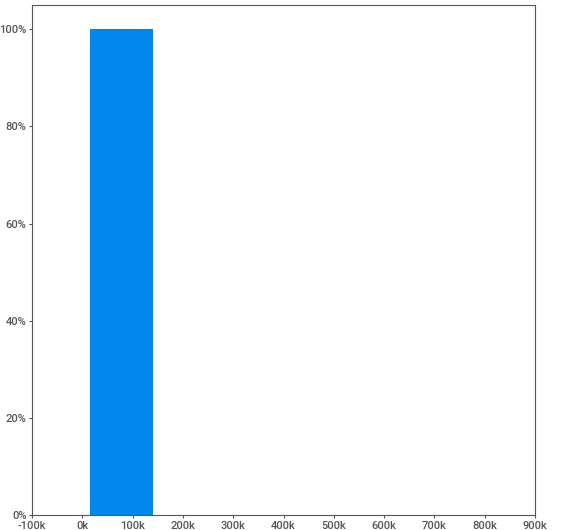
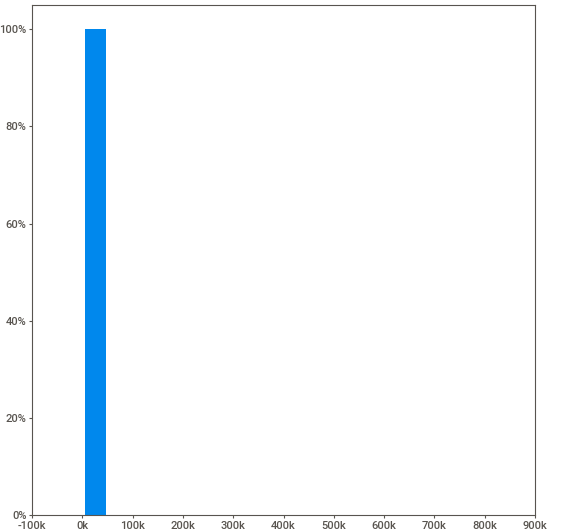
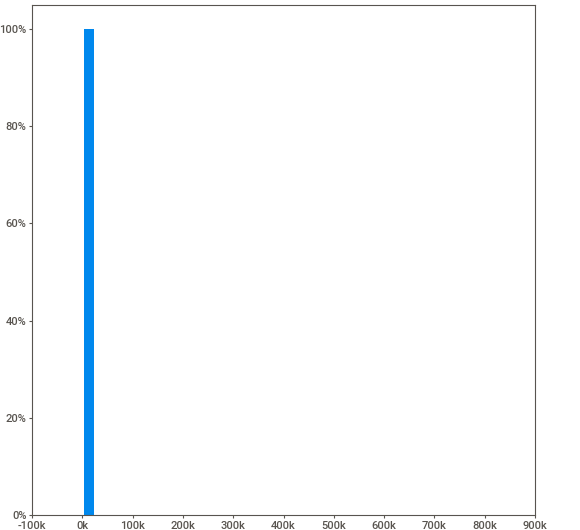
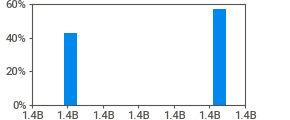
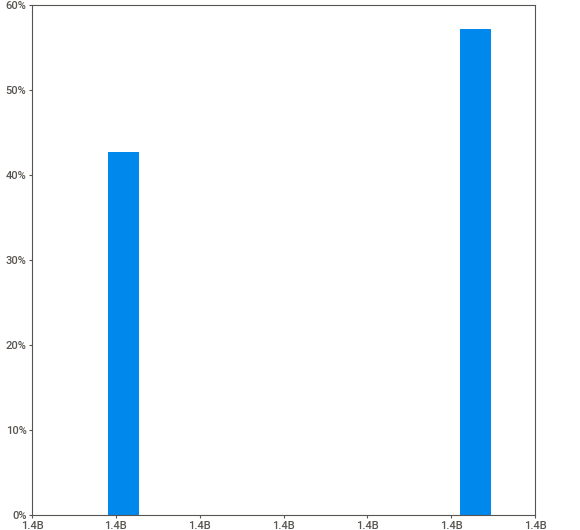
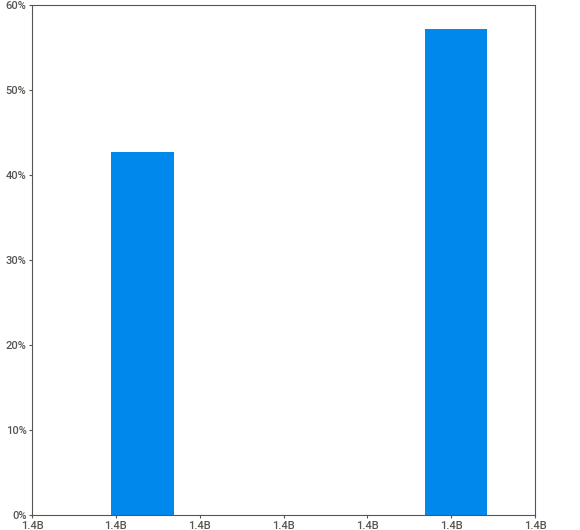
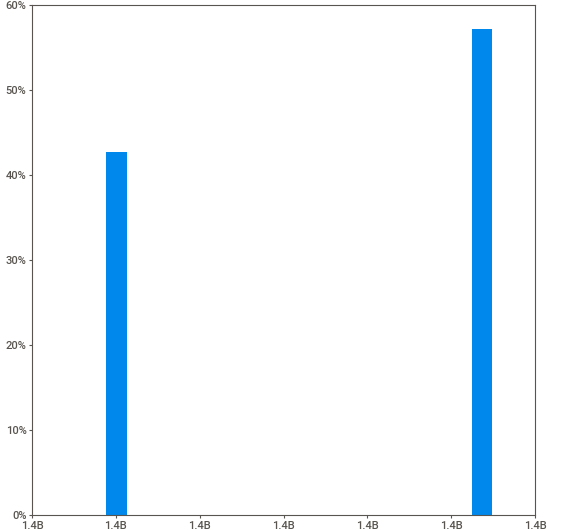
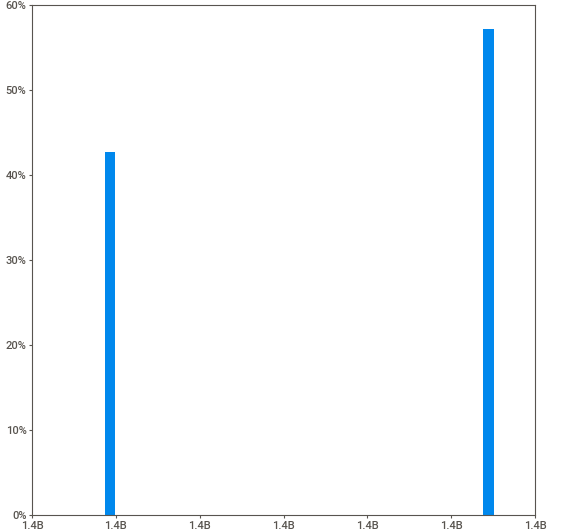
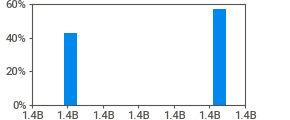
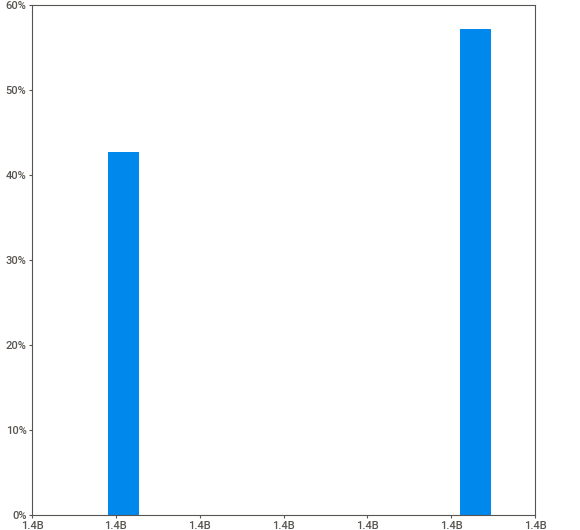
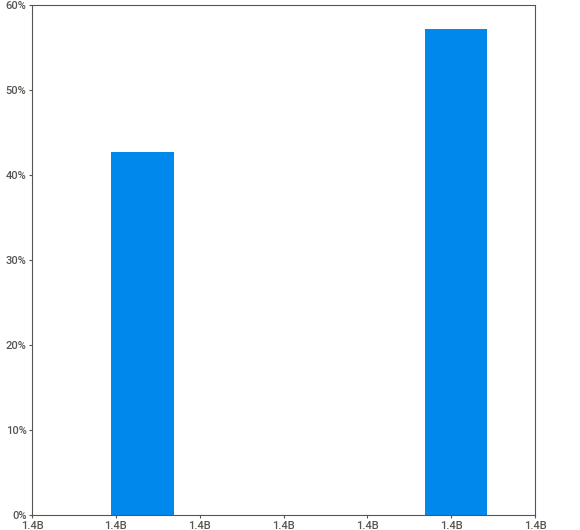
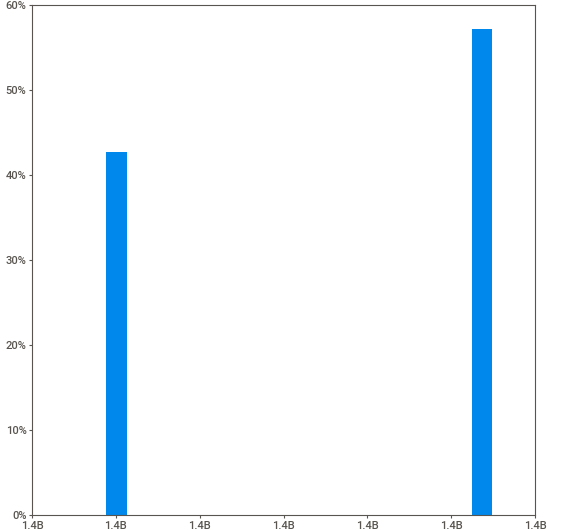
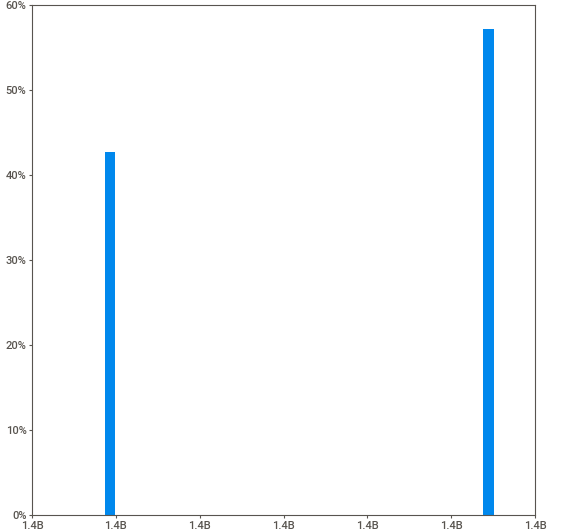
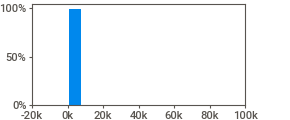
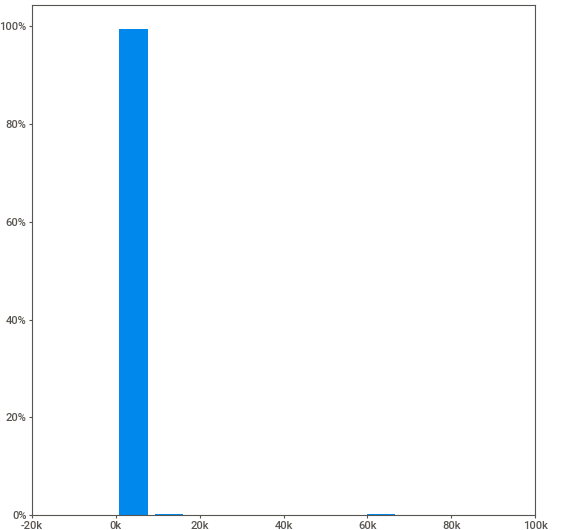
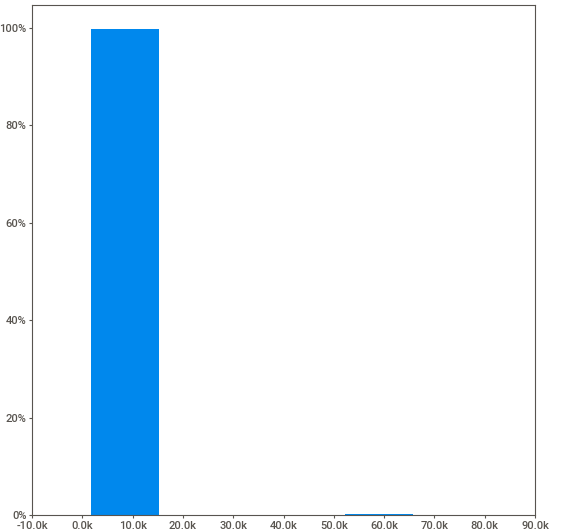
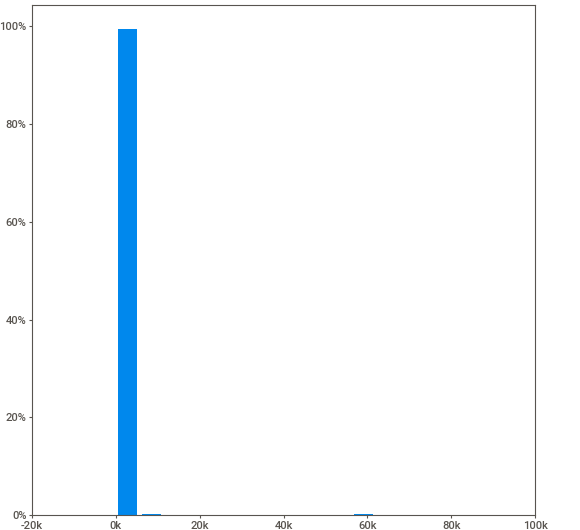
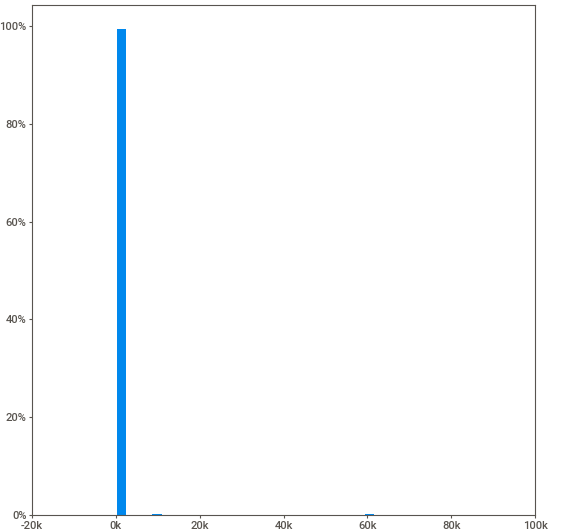
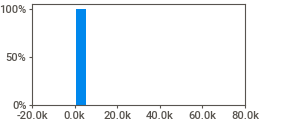
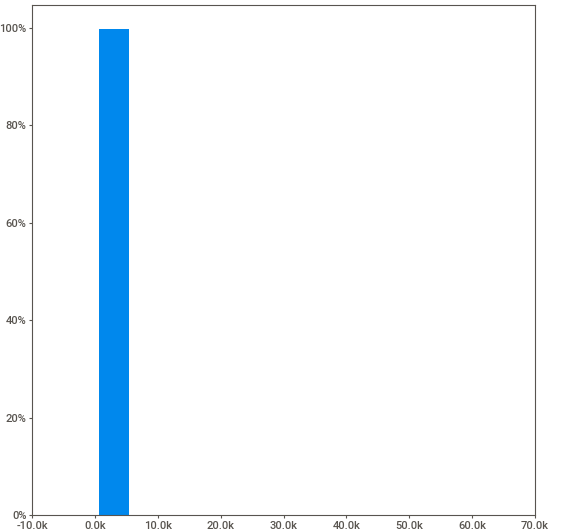
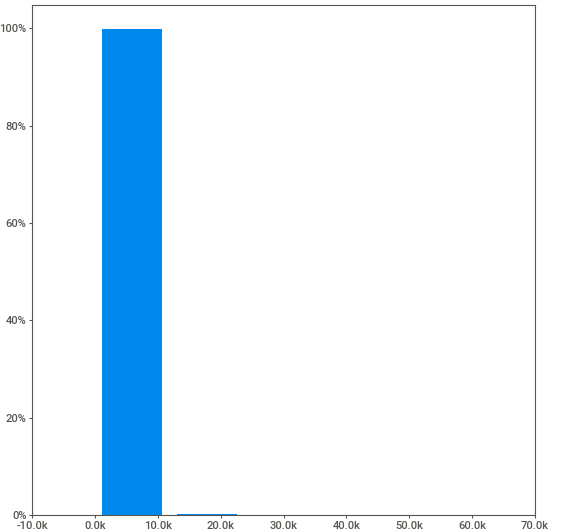
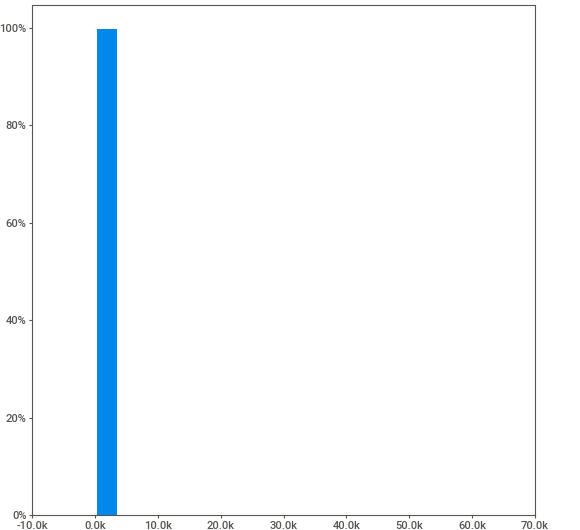
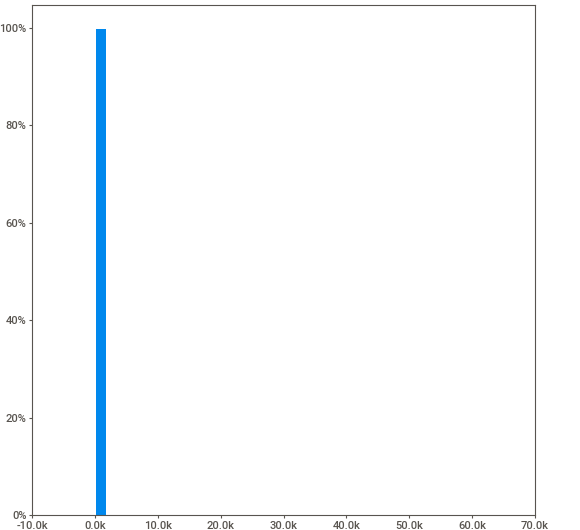
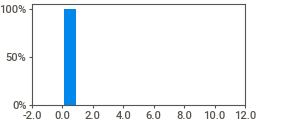
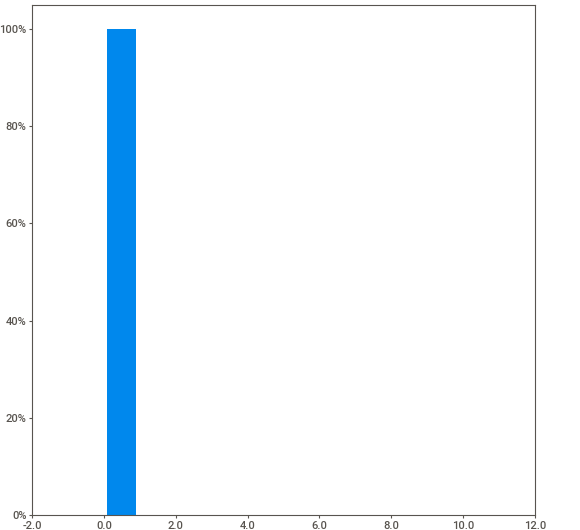
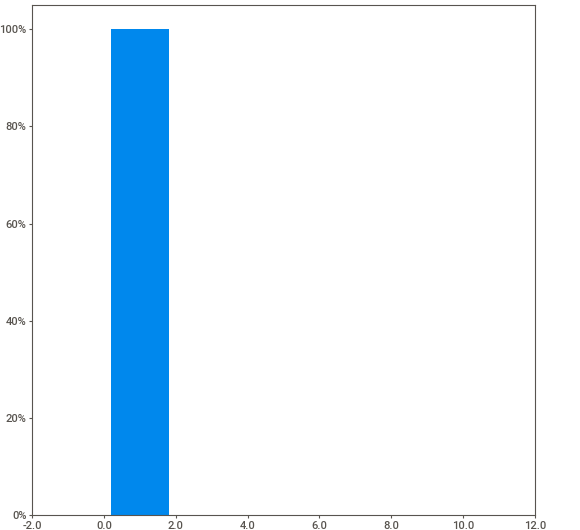
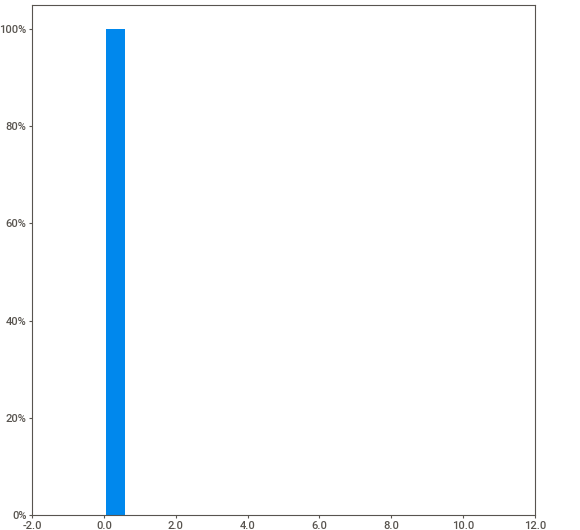
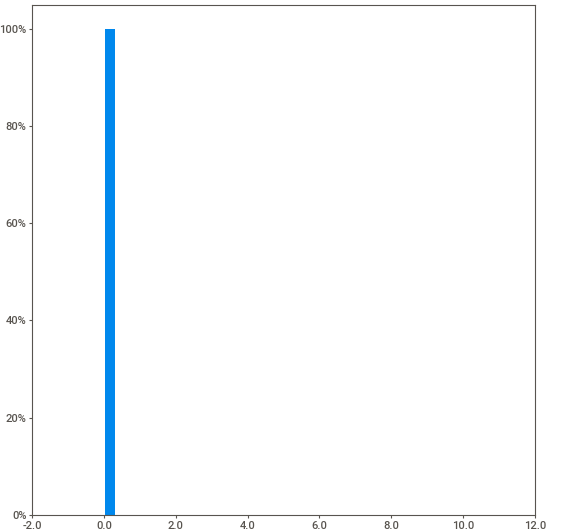
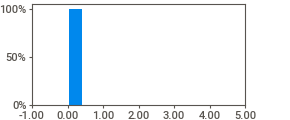
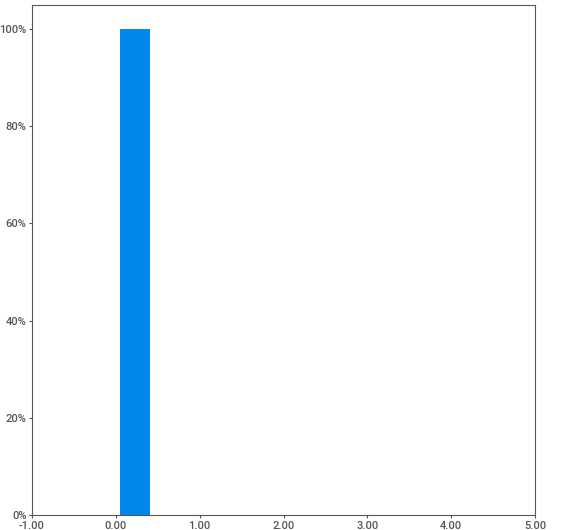
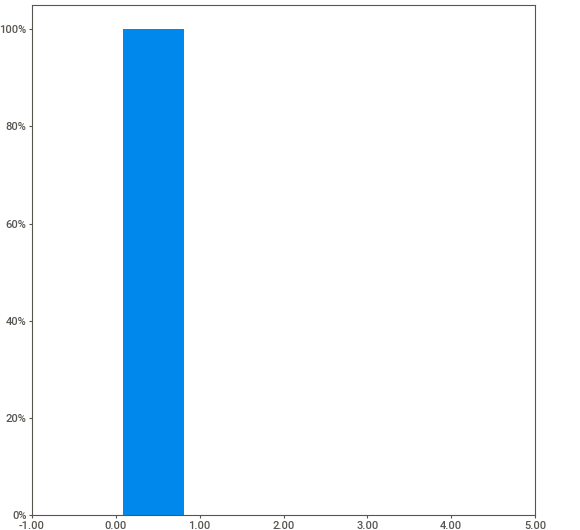
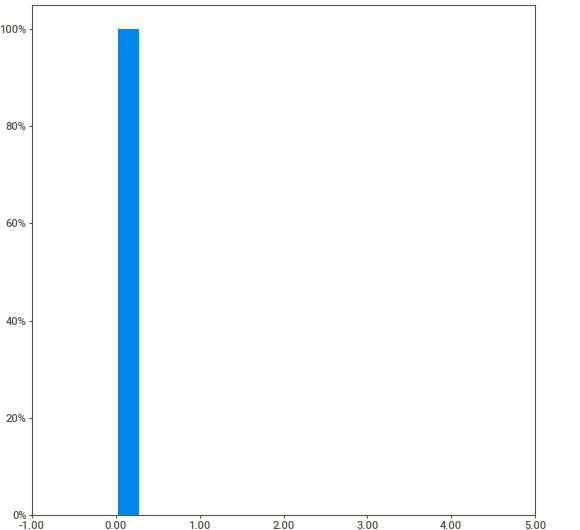
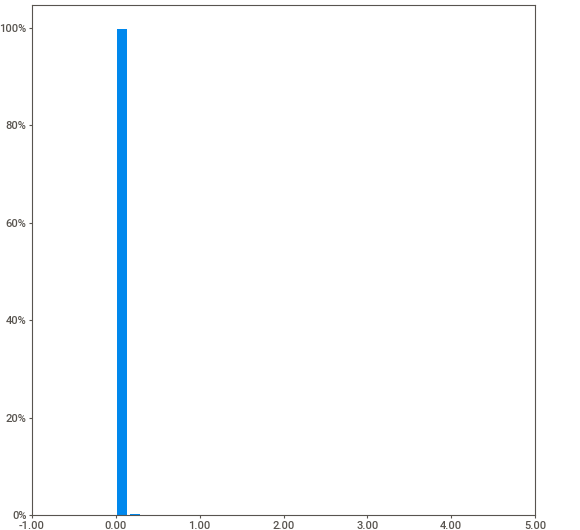
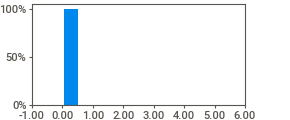
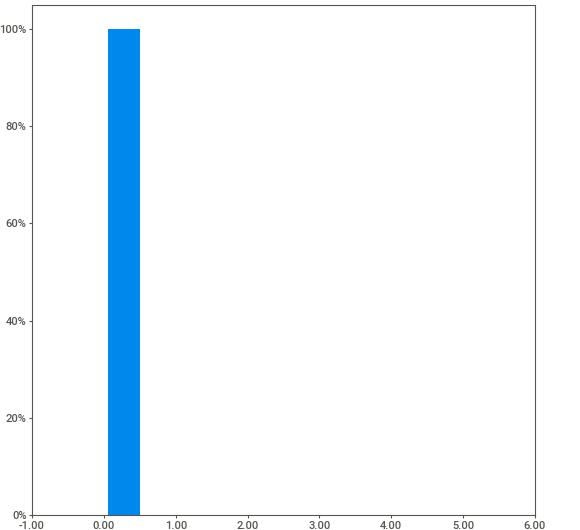
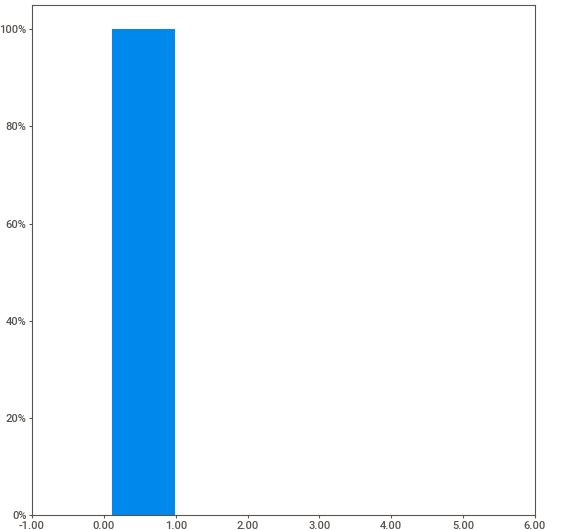
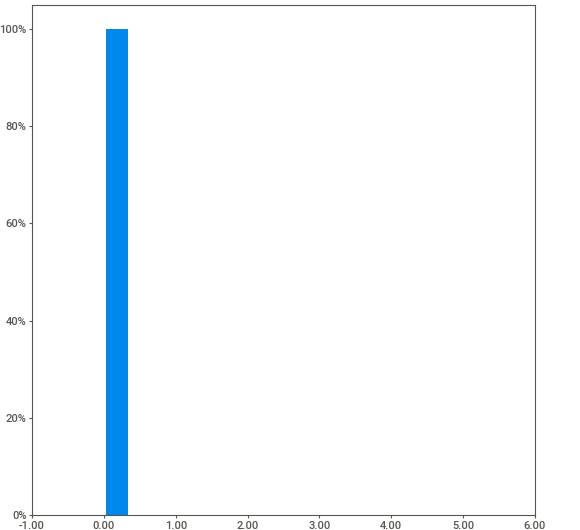
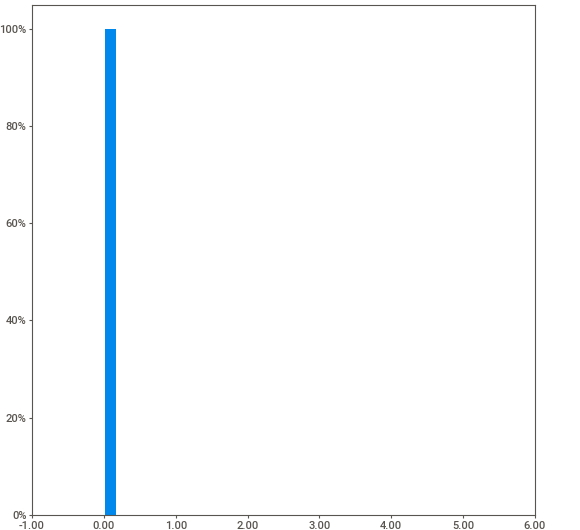
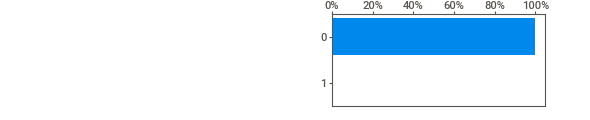
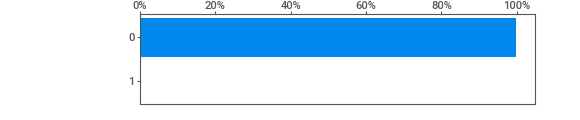
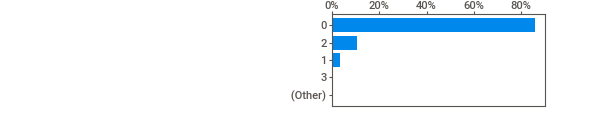
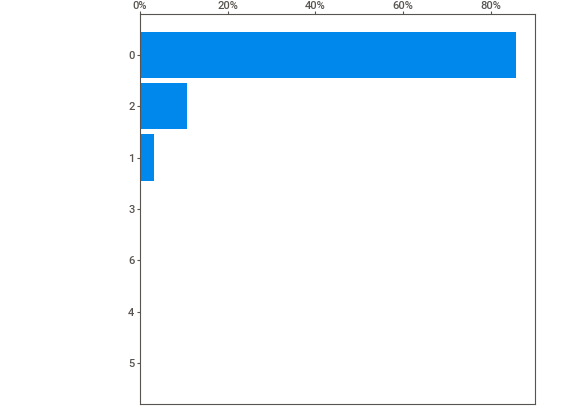
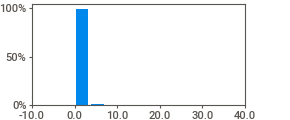
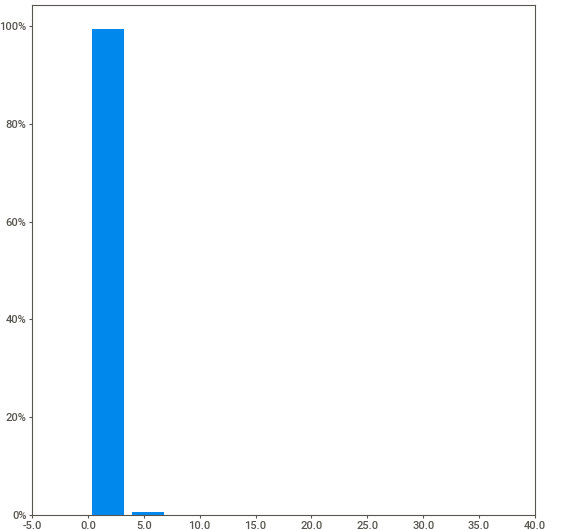
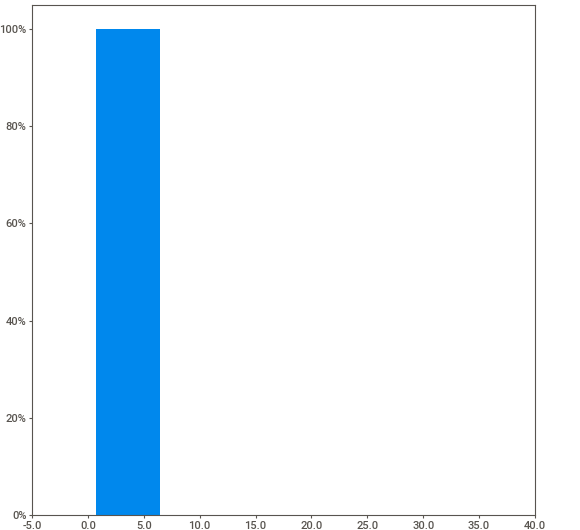
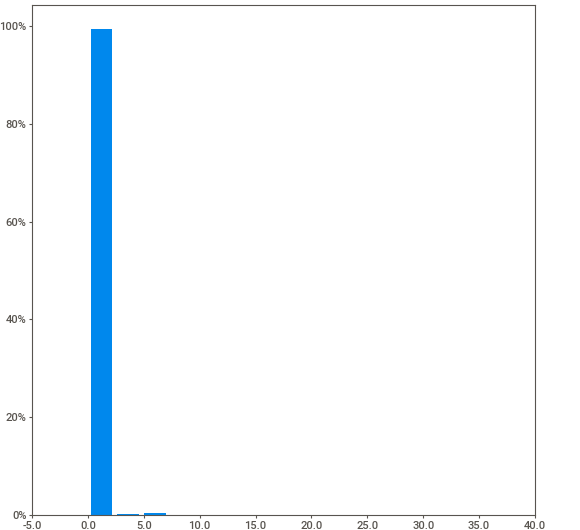
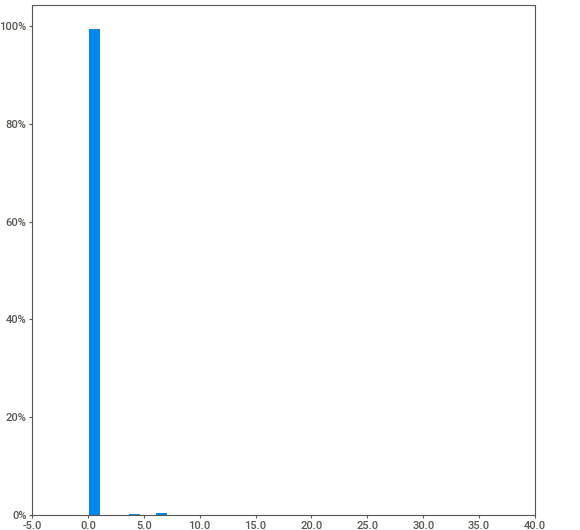
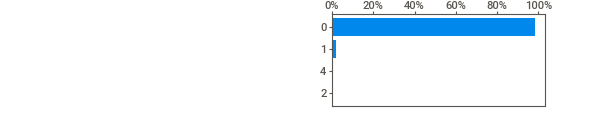
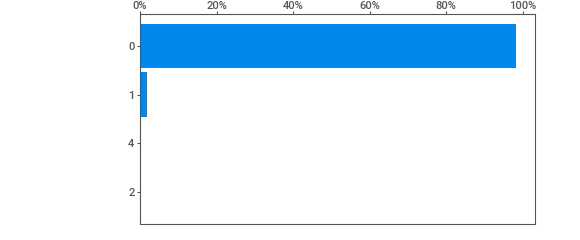
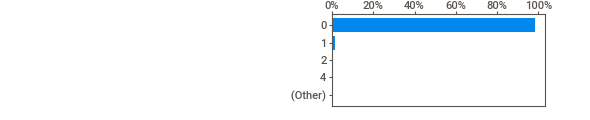
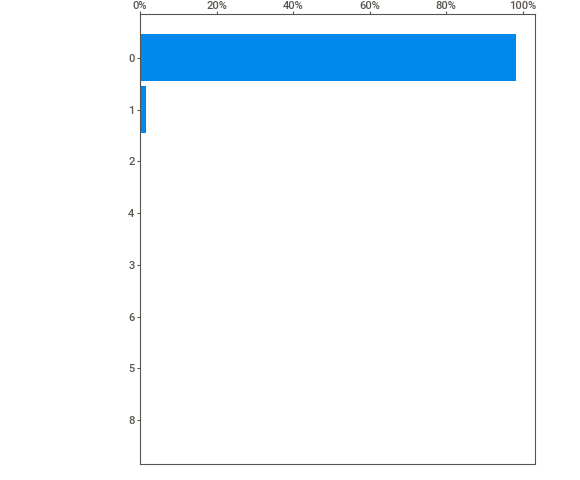
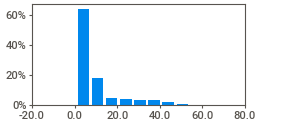
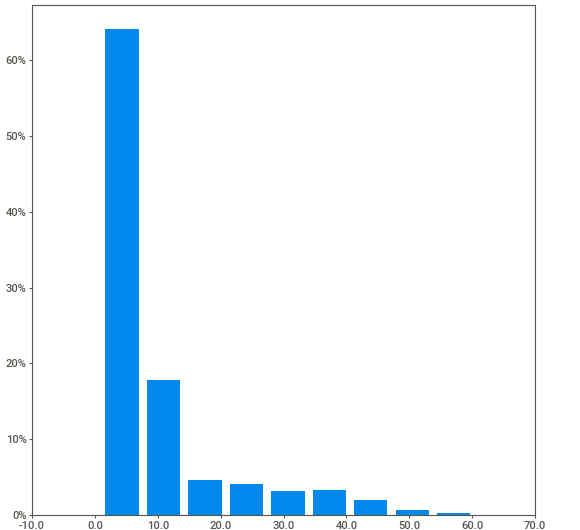
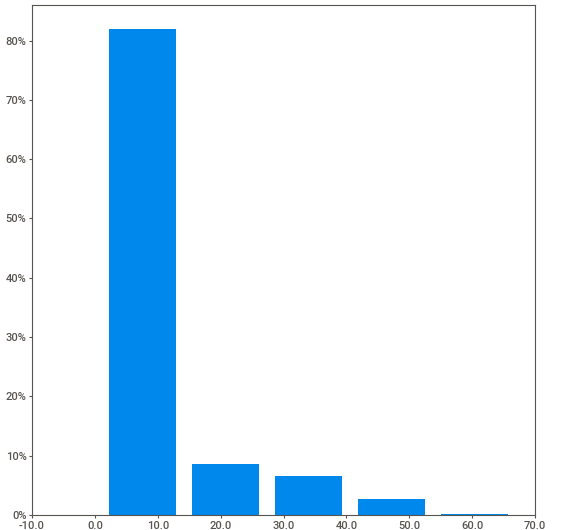
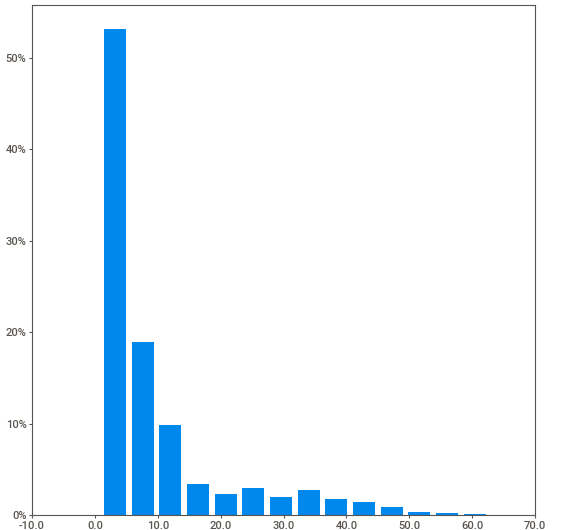
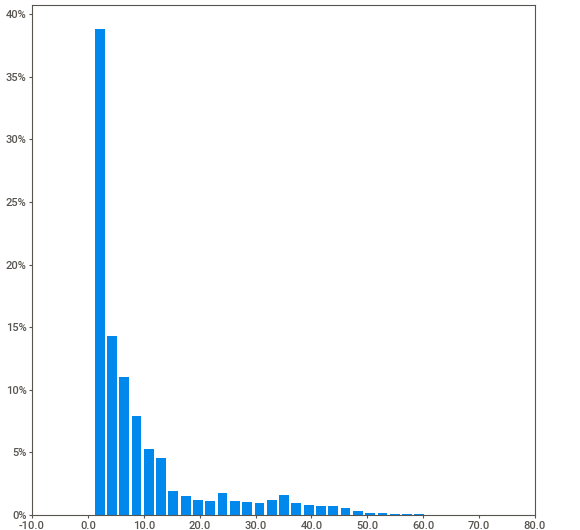
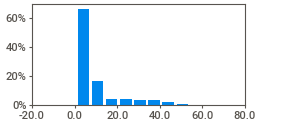
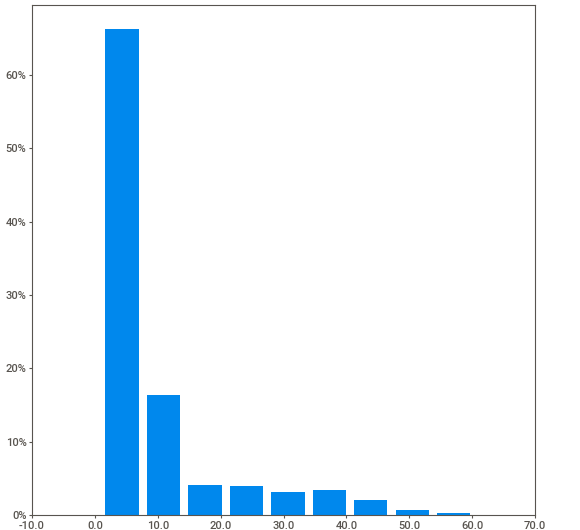
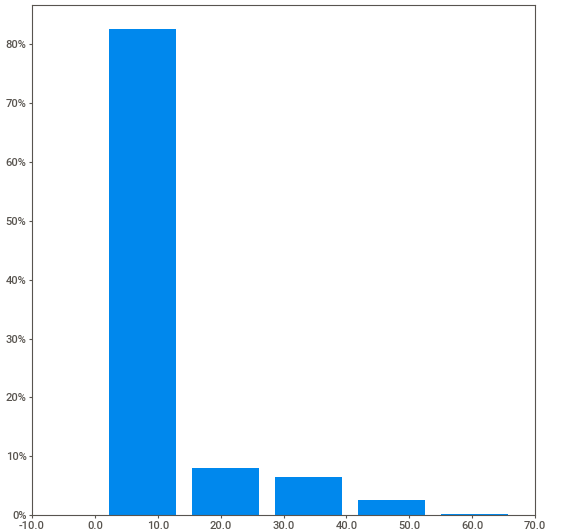
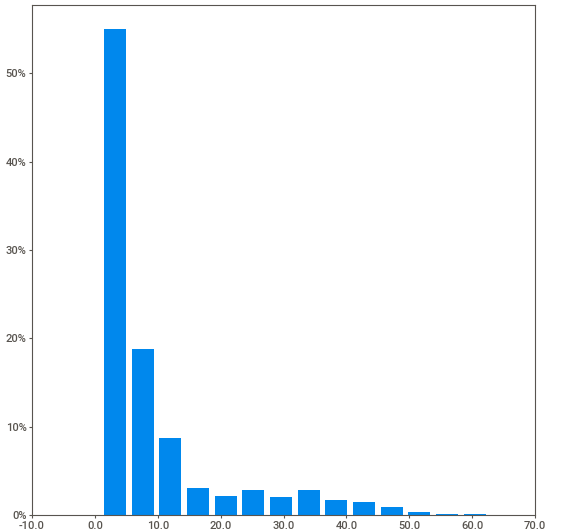
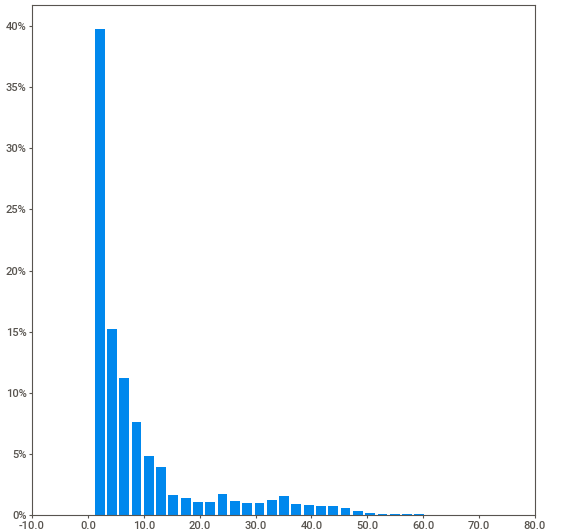
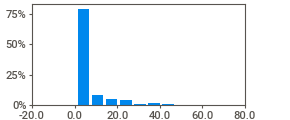
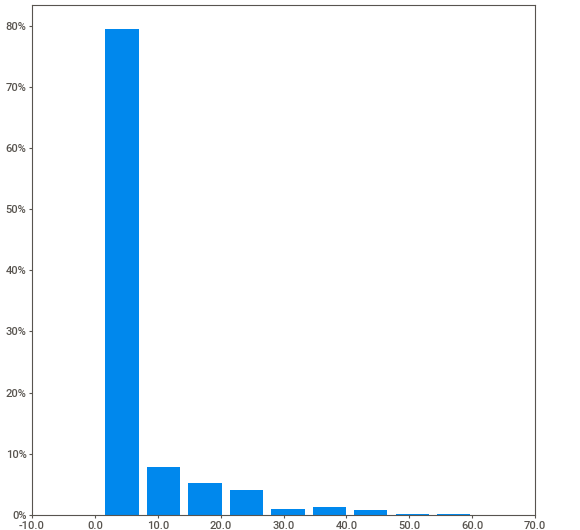
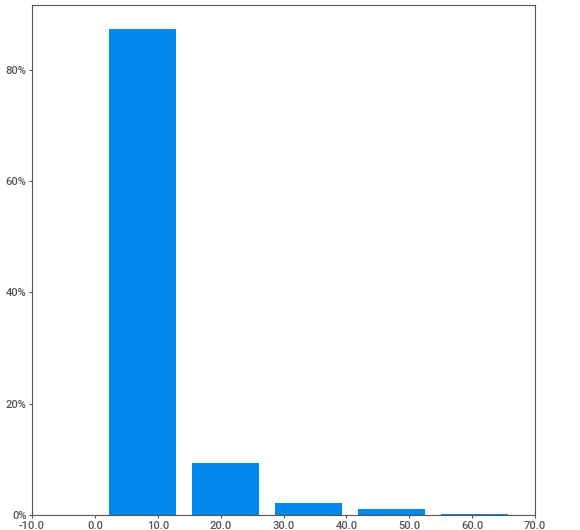
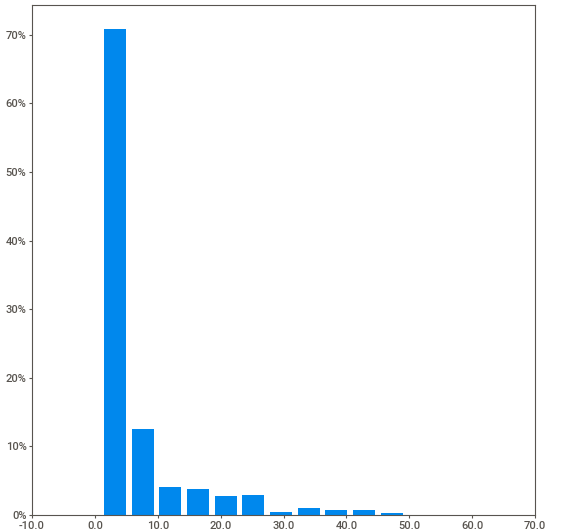
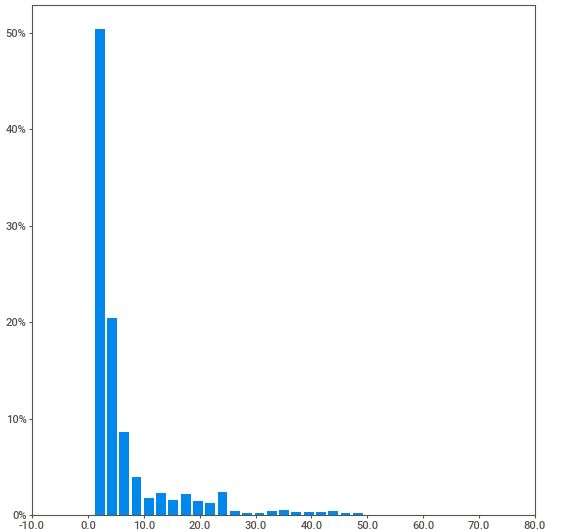
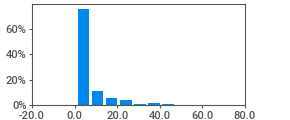
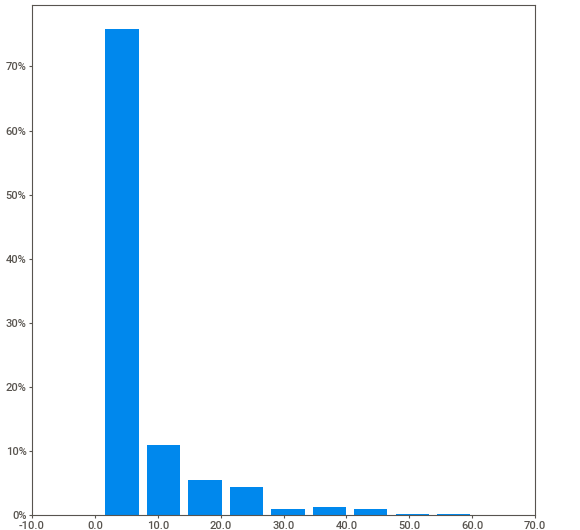
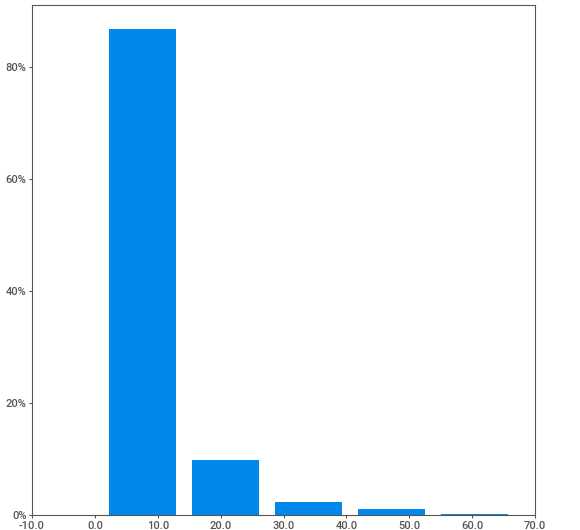
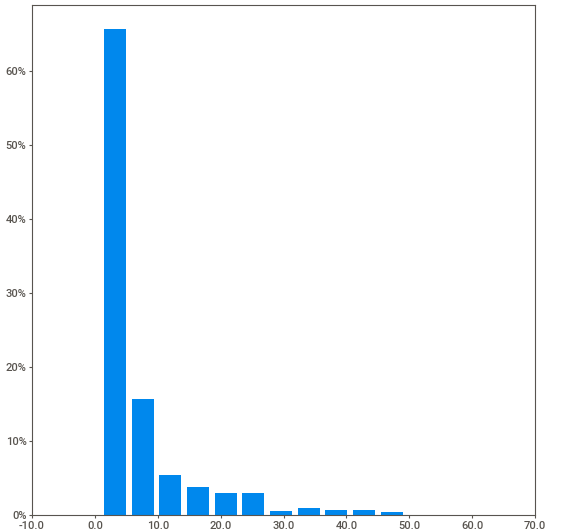
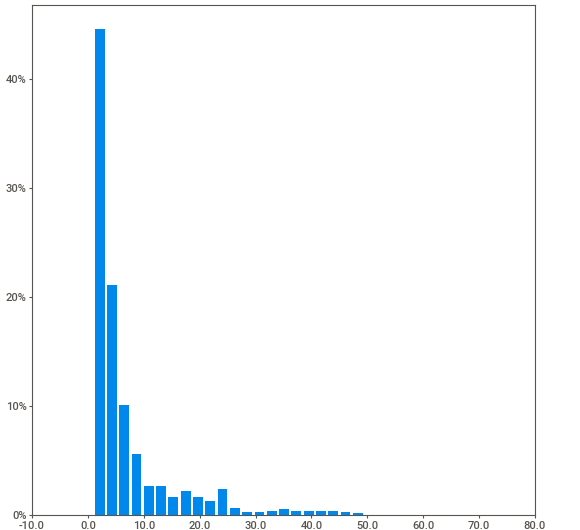
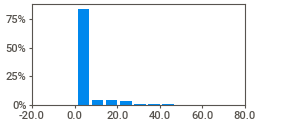
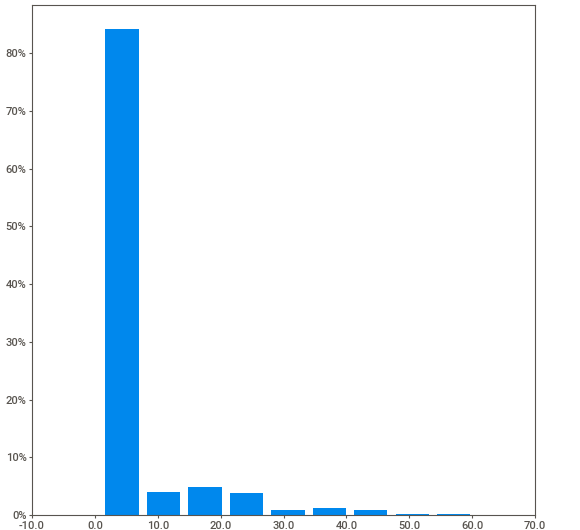
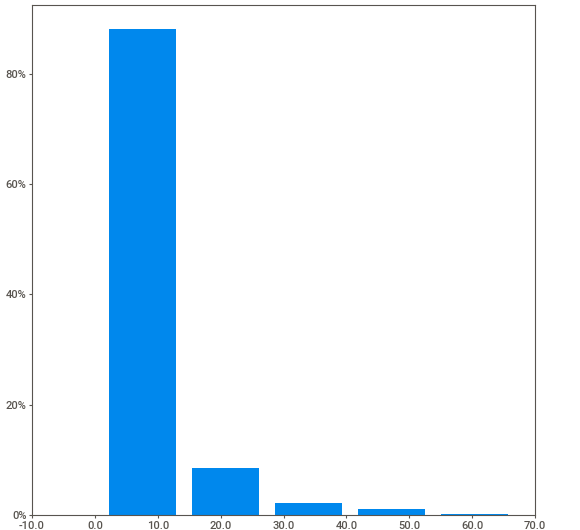
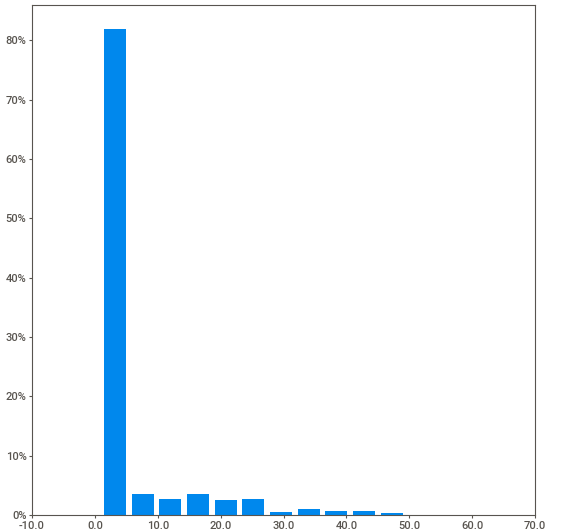
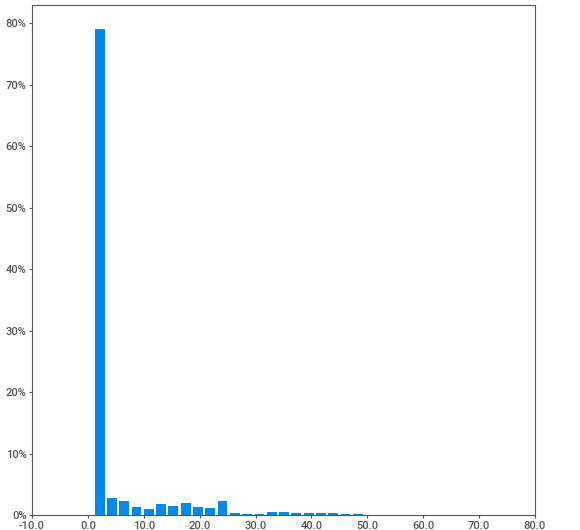
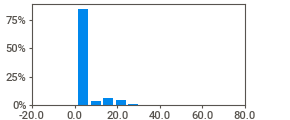
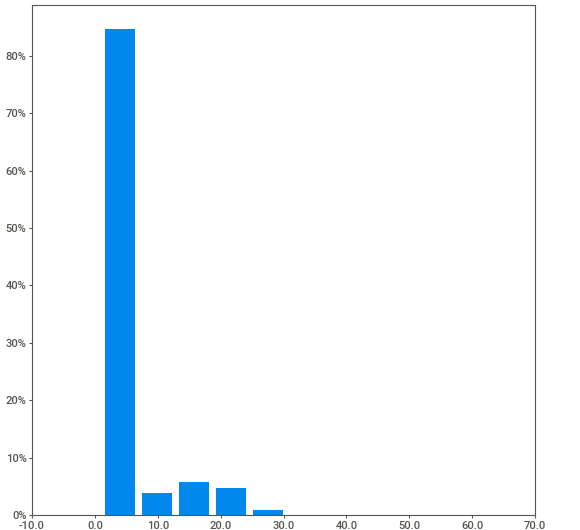
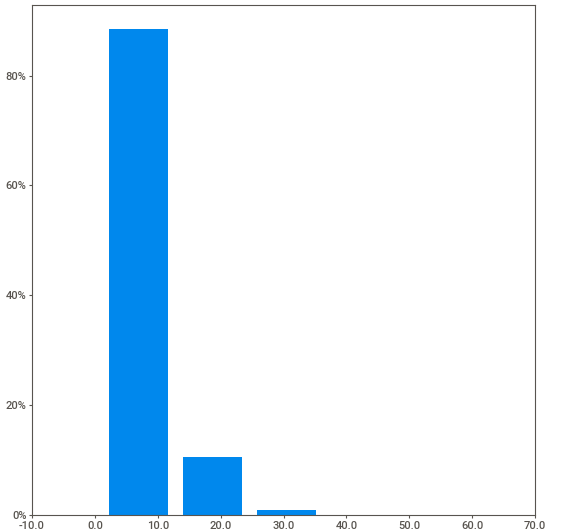
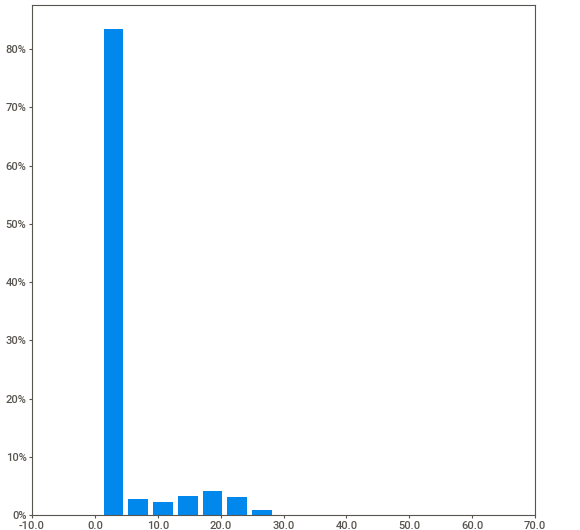
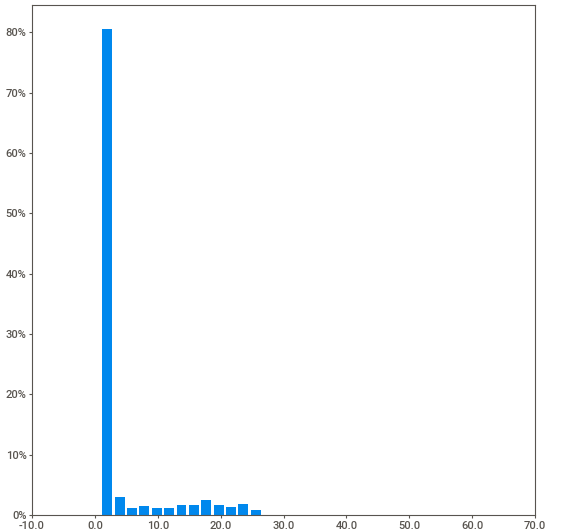
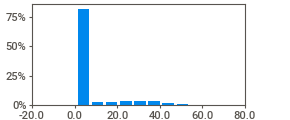
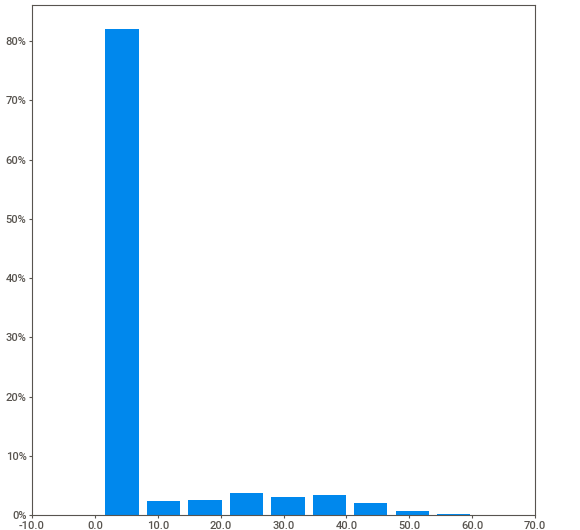
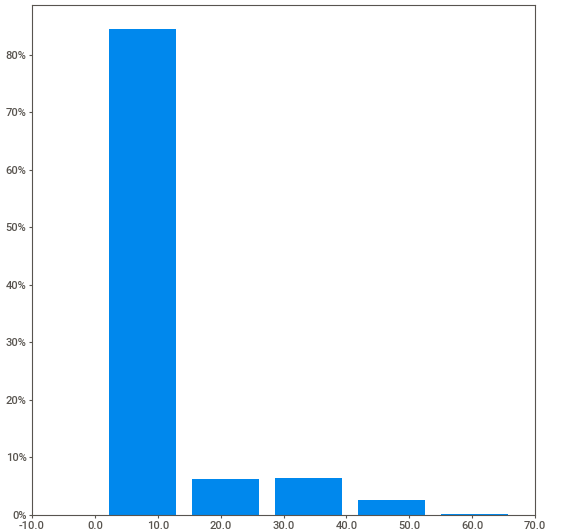
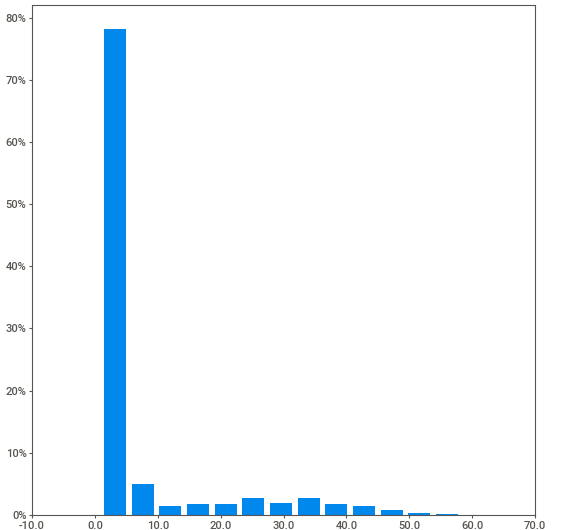
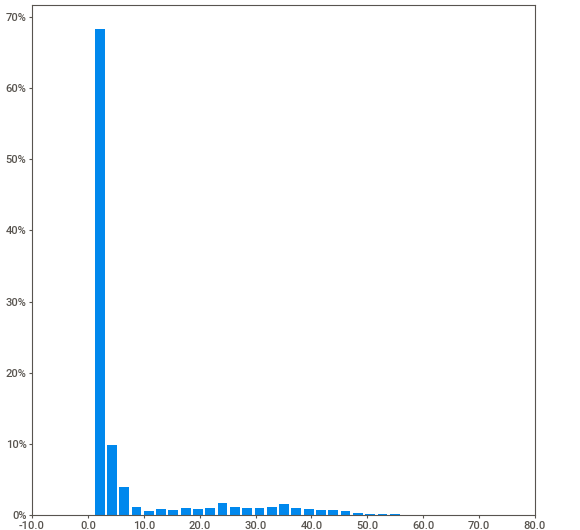
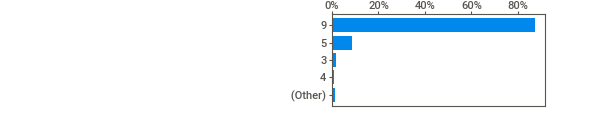
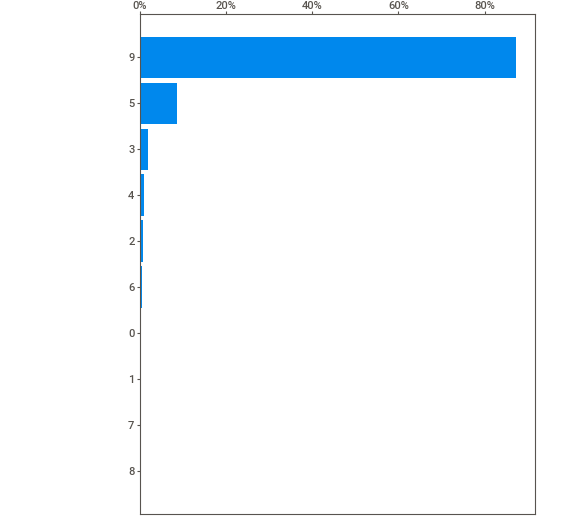
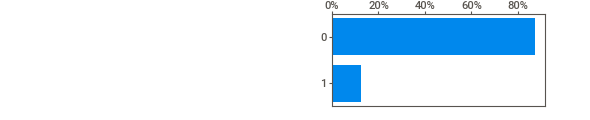
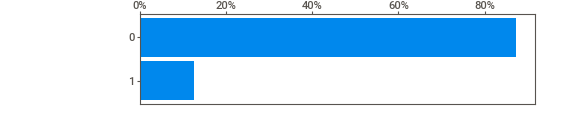
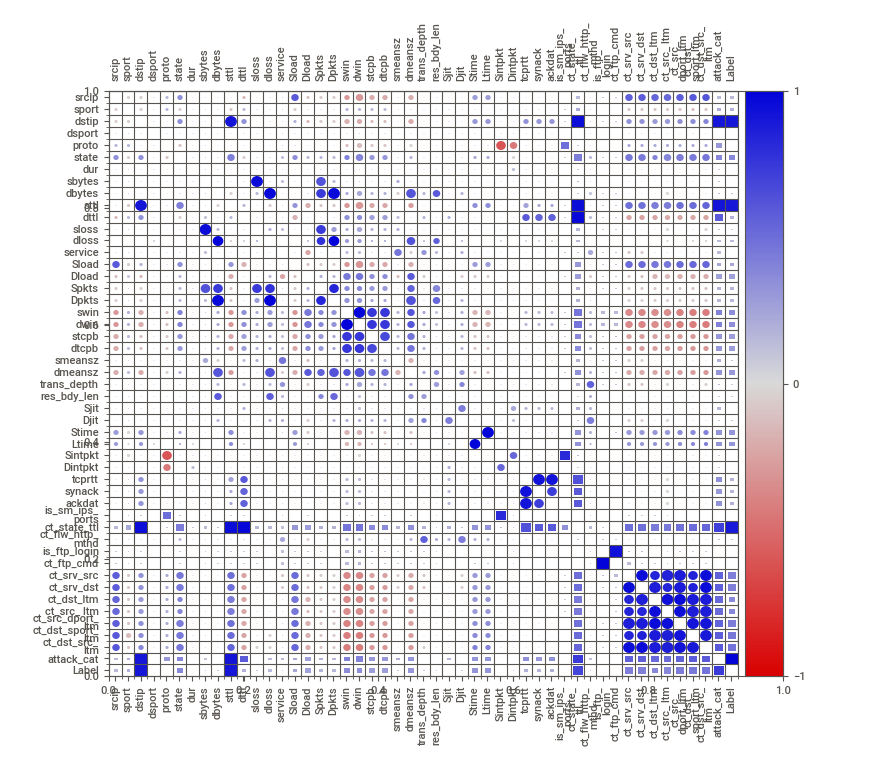
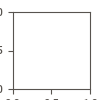

In [ ]:
my_report = sv.analyze(df)
my_report.show_notebook()

### Normalização dos dados

In [58]:
min_max_scaler = MinMaxScaler()

df[df.drop(columns = ["Label", "attack_cat"]).columns] = min_max_scaler.fit_transform(df.drop(columns = ["Label", "attack_cat"]))

### Salva-se os dados pré-processados

In [33]:
with open("../data/files/Normalized_Data.pkl", "wb") as file:
  pkl.dump(df, file)

## Análise de correlação das variáveis

### Para variáveis contínuas, usa-se o coeficiente R de Person. Para variáveis categóricas, usa-se o coeficiente V de Cramer. Já para variáveis contínuas-categóricas, usa-se o coeficiente de variação

In [ ]:
associations(df.drop(columns = ["attack_cat", "Label", "Stime", "Ltime"]), 
                     nominal_columns = ["srcip", "dstip", "proto", "state", "service"], 
                     figsize = (64, 32), 
                     filename = "../data/files/results/correlation_analysis.png");